## ML Advanced Exam

### Machine Learning Exam

Perform the following tasks:

### Flight Dataset

**1. Perform Feature Engineering**  
a) Perform basic exploration like checking for top 5 records, shape, statistical info, duplicates, Null values etc.  
b) Extract Date, Month, Year from Date of Journey column  


**2. Perform Exploratory Data Analysis (EDA) tasks**  
a) Which airline is most preferred airline  
b) Find the majority of the flights take off from which source  
c) Find maximum flights land in which destination  


**3. Compare independent features with Target feature to check the impact on price**  
a) Which airline has the highest price  
b) Check if the business class flights are high price or low and find only those flights which price is higher than 50k  


**4. Perform encoding for the required features according to the data**  


**5. Build multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest etc. and check the performance of your model.**  


**6. Compare all of the models and justify your choice about the optimum model by using different evaluation technique and tune the models as per the requirement.**  


**7. Write a conclusion from the business point of view. Finally perform the same preprocessing technique for test data best practice using pipeline.**  

### RFM Dataset
  
**8. Calculate the**  

a) recency (R),  
b) frequency (F),  
c) monetary value (M)  
for each customer based on the given dataset?

**9. Calculate RFM scores.**  
a) Each customer will get a note between 1 and 5 for each parameter for Recency(R), Frequency(F) and Monetary value(M)  
Ex: Scale for Recency:

1) 0-30 days  
2) 31-60 days  
3) 61-90 days  
4) 91-180 days  
5) 181-365 days  

b) Segment the customers based on their RFM scores using the dataset?
Segments with RFM score range:  

<body>
	<table>
		<thead>
			<tr>
                <th><u>Segment</u></th>
                <th><u>Description</u></th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>Champions</td>
				<td>Bought recently, buy often and spend the most</td>
			</tr>
			<tr>
				<td>Loyal Customer</td>
				<td>Buy on regular basis. Responsive to Promotions.</td>
			</tr>
			<tr>
				<td>Potential Loyalist</td>
				<td>Recent customer with average frequency.</td>
			</tr>
			<tr>
				<td>Recent Customers</td>
				<td>Bought most recently, but not often.</td>
			</tr>
			<tr>
				<td>Promising</td>
				<td>Recent shoppers, but have't spent much.</td>
			</tr>
			<tr>
				<td>Customers Needing Attention</td>
				<td>Above average recency, frequency and monetary values. may not have bought very recently though.</td>
			</tr>
			<tr>
				<td>About to Sleep</td>
				<td>Below average recency and frequency. will lose them if not reactivated.</td>
			</tr>
			<tr>
				<td>At Risk</td>
				<td>Purchase often but a long time ago. Need to bring them back!</td>
			</tr>
			<tr>
				<td>Can't Lose Them</td>
				<td>Used to purchasde frequently but haven't returned for a long time.</td>
			</tr>
			<tr>
				<td>Hibernating</td>
				<td>Last purchase was long back and low number of orders. May be lost</td>
			</tr>
        </tbody>
	</table>
</body>

- Champions: RFM score range - R: 4-5, F: 4-5, M: 4-5
- Loyal customers: RFM score range - R: 3-5, F: 3-5, M: 3-5
- Potential loyalist: RFM score range - R: 4-5, F: 2-3, M: 2-3
- Recent customers: RFM score range - R: 4-5, F: 1-2, M: 1-2
- Promising: RFM score range - R: 4-5, F: 1-2, M: 1-2
- Needs attention: RFM score range - R: 3-5, F: 3-5, M: 3-5
- About to sleep: RFM score range - R: 1-2, F: 1-2, M: 1-2
- At risk: RFM score range - R: 2-5, F: 1-3, M: 1-3
- Can't lose them: RFM score range - R: 1-3, F: 4-5, M: 4-5
- Hibernating: RFM score range - R: 1-2, F: 1-2, M: 1-2

**10.**  
a) Visualize the RFM segments.  
b) Conclude your findings of RFM analysis and suggest some strategies on it.

In [1]:
# Importing Required Lobraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import mlxtend
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import datetime as dt
import re
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import collections
from collections import Counter
from collections import defaultdict
import itertools
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

![]("C:\Users\ASUS\Downloads\flights.jpg")

# Part 1 : Flights Data

![Alt text](https://www.savethestudent.org/uploads/flights.jpg)

In [2]:
df_test = pd.read_excel(r"C:\Users\ASUS\Flight_Price_Test.xlsx")

# Check the top 5 records
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [3]:
df_train = pd.read_excel(r"C:\Users\ASUS\Flight_Price_Train.xlsx")

# Check the top 5 records
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### EDA

### Traning Data

### 1. Perform Feature Engineering.
**A) Perform basic exploration like checking for top 5 records, shape, statistical info, duplicates, Null values etc.**

In [4]:
# Get the shape of the dataset (number of rows and columns)

print("Shape of the dataset:", df_train.shape)

Shape of the dataset: (10683, 11)


In [5]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
# Get statistical information about the numerical columns

print("STATISTICAL INFORMATION ABOUT DATASET")
df_train.describe()

STATISTICAL INFORMATION ABOUT DATASET


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Test Data

In [7]:
df_test.shape

(2671, 10)

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [9]:
# Checking Statistical Summary

df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [10]:
# Checking columns names

df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

**Checking for duplicates values**

In [11]:
print("Duplicated records in train data:", df_train.duplicated().sum())
print("Duplicated records in test data:", df_test.duplicated().sum())

Duplicated records in train data: 220
Duplicated records in test data: 26


In [12]:
# We have a dataset with no customer data and only individual flights data.
# We will drop duplicates from the training data to avoid overfitting on certain records.

df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)
print("Duplicated records in train data:", df_train.duplicated().sum())
print("Duplicated records in test data:", df_test.duplicated().sum())

Duplicated records in train data: 0
Duplicated records in test data: 0


### Ckecking for missing values

In [13]:
# Check for null values

df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [15]:
# We only have 2 Null values, so we can drop them without a significant data loss

df_train.dropna(inplace=True)
df_train.shape

(10462, 11)

In [16]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Train Data

**B) Extract Date, Month, Year from Date of Journey column**

In [17]:
# Extracting Date, Month, Year from Date of Journey column & Time(Minute and Hour) from Dep_Time column
# Finally, we will drop 'Date_of_Journey', 'Dep_Time', 'Arrival_Time' columns

df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'], format='%d/%m/%Y')

df_train['Time'] = pd.to_datetime(df_train['Dep_Time'], format='%H:%M')
df_train['Minute'] = df_train['Time'].dt.minute
df_train['Hour'] = df_train['Time'].dt.hour
df_train['Day'] = df_train['Date_of_Journey'].dt.day
df_train['Month'] = df_train['Date_of_Journey'].dt.month
df_train['Year'] = df_train['Date_of_Journey'].dt.year
df_train.drop(columns=['Date_of_Journey', 'Dep_Time', 'Time', 'Arrival_Time'], axis=1, inplace=True)

df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Minute,Hour,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,20,22,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,50,5,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,25,9,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,18,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,50,16,1,3,2019


In [18]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Minute', 'Hour', 'Day', 'Month', 'Year'],
      dtype='object')

In [19]:
# Function to convert duration to minutes
def duration_to_minutes(Duration):
    hours = 0
    minutes = 0

    # Extract hours and minutes using regular expressions
    hours_match = re.search(r'(\d+)h', Duration)
    minutes_match = re.search(r'(\d+)m', Duration)

    if hours_match is None:
        hours = 0
    else:
        hours = int(hours_match.group(1))
    if minutes_match is None:
        minutes = 0
    else:
        minutes = int(hours_match.group(1))
        

    return hours * 60 + minutes

In [20]:
import re

# Function to convert duration to minutes
def duration_to_minutes(Duration):
    hours = 0
    minutes = 0

    # Extract hours and minutes using regular expressions
    hours_match = re.search(r'(\d+)h', Duration)
    minutes_match = re.search(r'(\d+)m', Duration)

    if hours_match is None:
        hours = 0
    else:
        hours = int(hours_match.group(1))

    if minutes_match is None:
        minutes = 0
    else:
        minutes = int(minutes_match.group(1))

    return hours * 60 + minutes

# # Example usage
# duration = "2h 30m"
# result = duration_to_minutes(duration)
# print(result)


In [21]:
# Converting duration column to minutes

# Using function
df_train['Duration'] = df_train['Duration'].apply(duration_to_minutes)
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Minute,Hour,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,20,22,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,50,5,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,25,9,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,18,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,50,16,1,3,2019


In [22]:
df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Minute             0
Hour               0
Day                0
Month              0
Year               0
dtype: int64

In [23]:
# Convert the 'Additional_Info' column to string type
df_train['Additional_Info'] = df_train['Additional_Info'].astype(str)

# Replace 'No Info' with 'No info' (case-insensitive)
df_train['Additional_Info'] = df_train['Additional_Info'].str.replace('No Info', 'No info', case=False)

# Check the value counts
df_train['Additional_Info'].value_counts()

Additional_Info
No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10462 non-null  int64 
 5   Total_Stops      10462 non-null  object
 6   Additional_Info  10462 non-null  object
 7   Price            10462 non-null  int64 
 8   Minute           10462 non-null  int32 
 9   Hour             10462 non-null  int32 
 10  Day              10462 non-null  int32 
 11  Month            10462 non-null  int32 
 12  Year             10462 non-null  int32 
dtypes: int32(5), int64(2), object(6)
memory usage: 939.9+ KB


### Test Data

In [25]:
# Extracting Date, Month, Year from Date of Journey column & Time(Minute and Hour) from Dep_Time column
# Finally, we will drop 'Date_of_Journey', 'Dep_Time', 'Arrival_Time' columns

df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y')

df_test['Time'] = pd.to_datetime(df_test['Dep_Time'], format='%H:%M')
df_test['Minute'] = df_test['Time'].dt.minute
df_test['Hour'] = df_test['Time'].dt.hour
df_test['Day'] = df_test['Date_of_Journey'].dt.day
df_test['Month'] = df_test['Date_of_Journey'].dt.month
df_test['Year'] = df_test['Date_of_Journey'].dt.year
df_test.drop(columns=['Date_of_Journey', 'Dep_Time', 'Time', 'Arrival_Time'], axis=1, inplace=True)

df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Minute,Hour,Day,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,30,17,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,20,6,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,15,19,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,0,8,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,55,23,24,6,2019


In [26]:
# Converting duration column to minutes

# Using function
df_test['Duration'] = df_test['Duration'].apply(duration_to_minutes)
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Minute,Hour,Day,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,30,17,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,20,6,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,15,19,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,0,8,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,55,23,24,6,2019


In [27]:
# No need to fix Additional_Info column in test data

df_test['Additional_Info'].value_counts()

Additional_Info
No info                         2126
In-flight meal not included      440
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: count, dtype: int64

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2645 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Source           2645 non-null   object
 2   Destination      2645 non-null   object
 3   Route            2645 non-null   object
 4   Duration         2645 non-null   int64 
 5   Total_Stops      2645 non-null   object
 6   Additional_Info  2645 non-null   object
 7   Minute           2645 non-null   int32 
 8   Hour             2645 non-null   int32 
 9   Day              2645 non-null   int32 
 10  Month            2645 non-null   int32 
 11  Year             2645 non-null   int32 
dtypes: int32(5), int64(1), object(6)
memory usage: 217.0+ KB


### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2. Perform Exploratory Data Analysis (EDA) tasks
**A) Which airline is most preferred airline.**

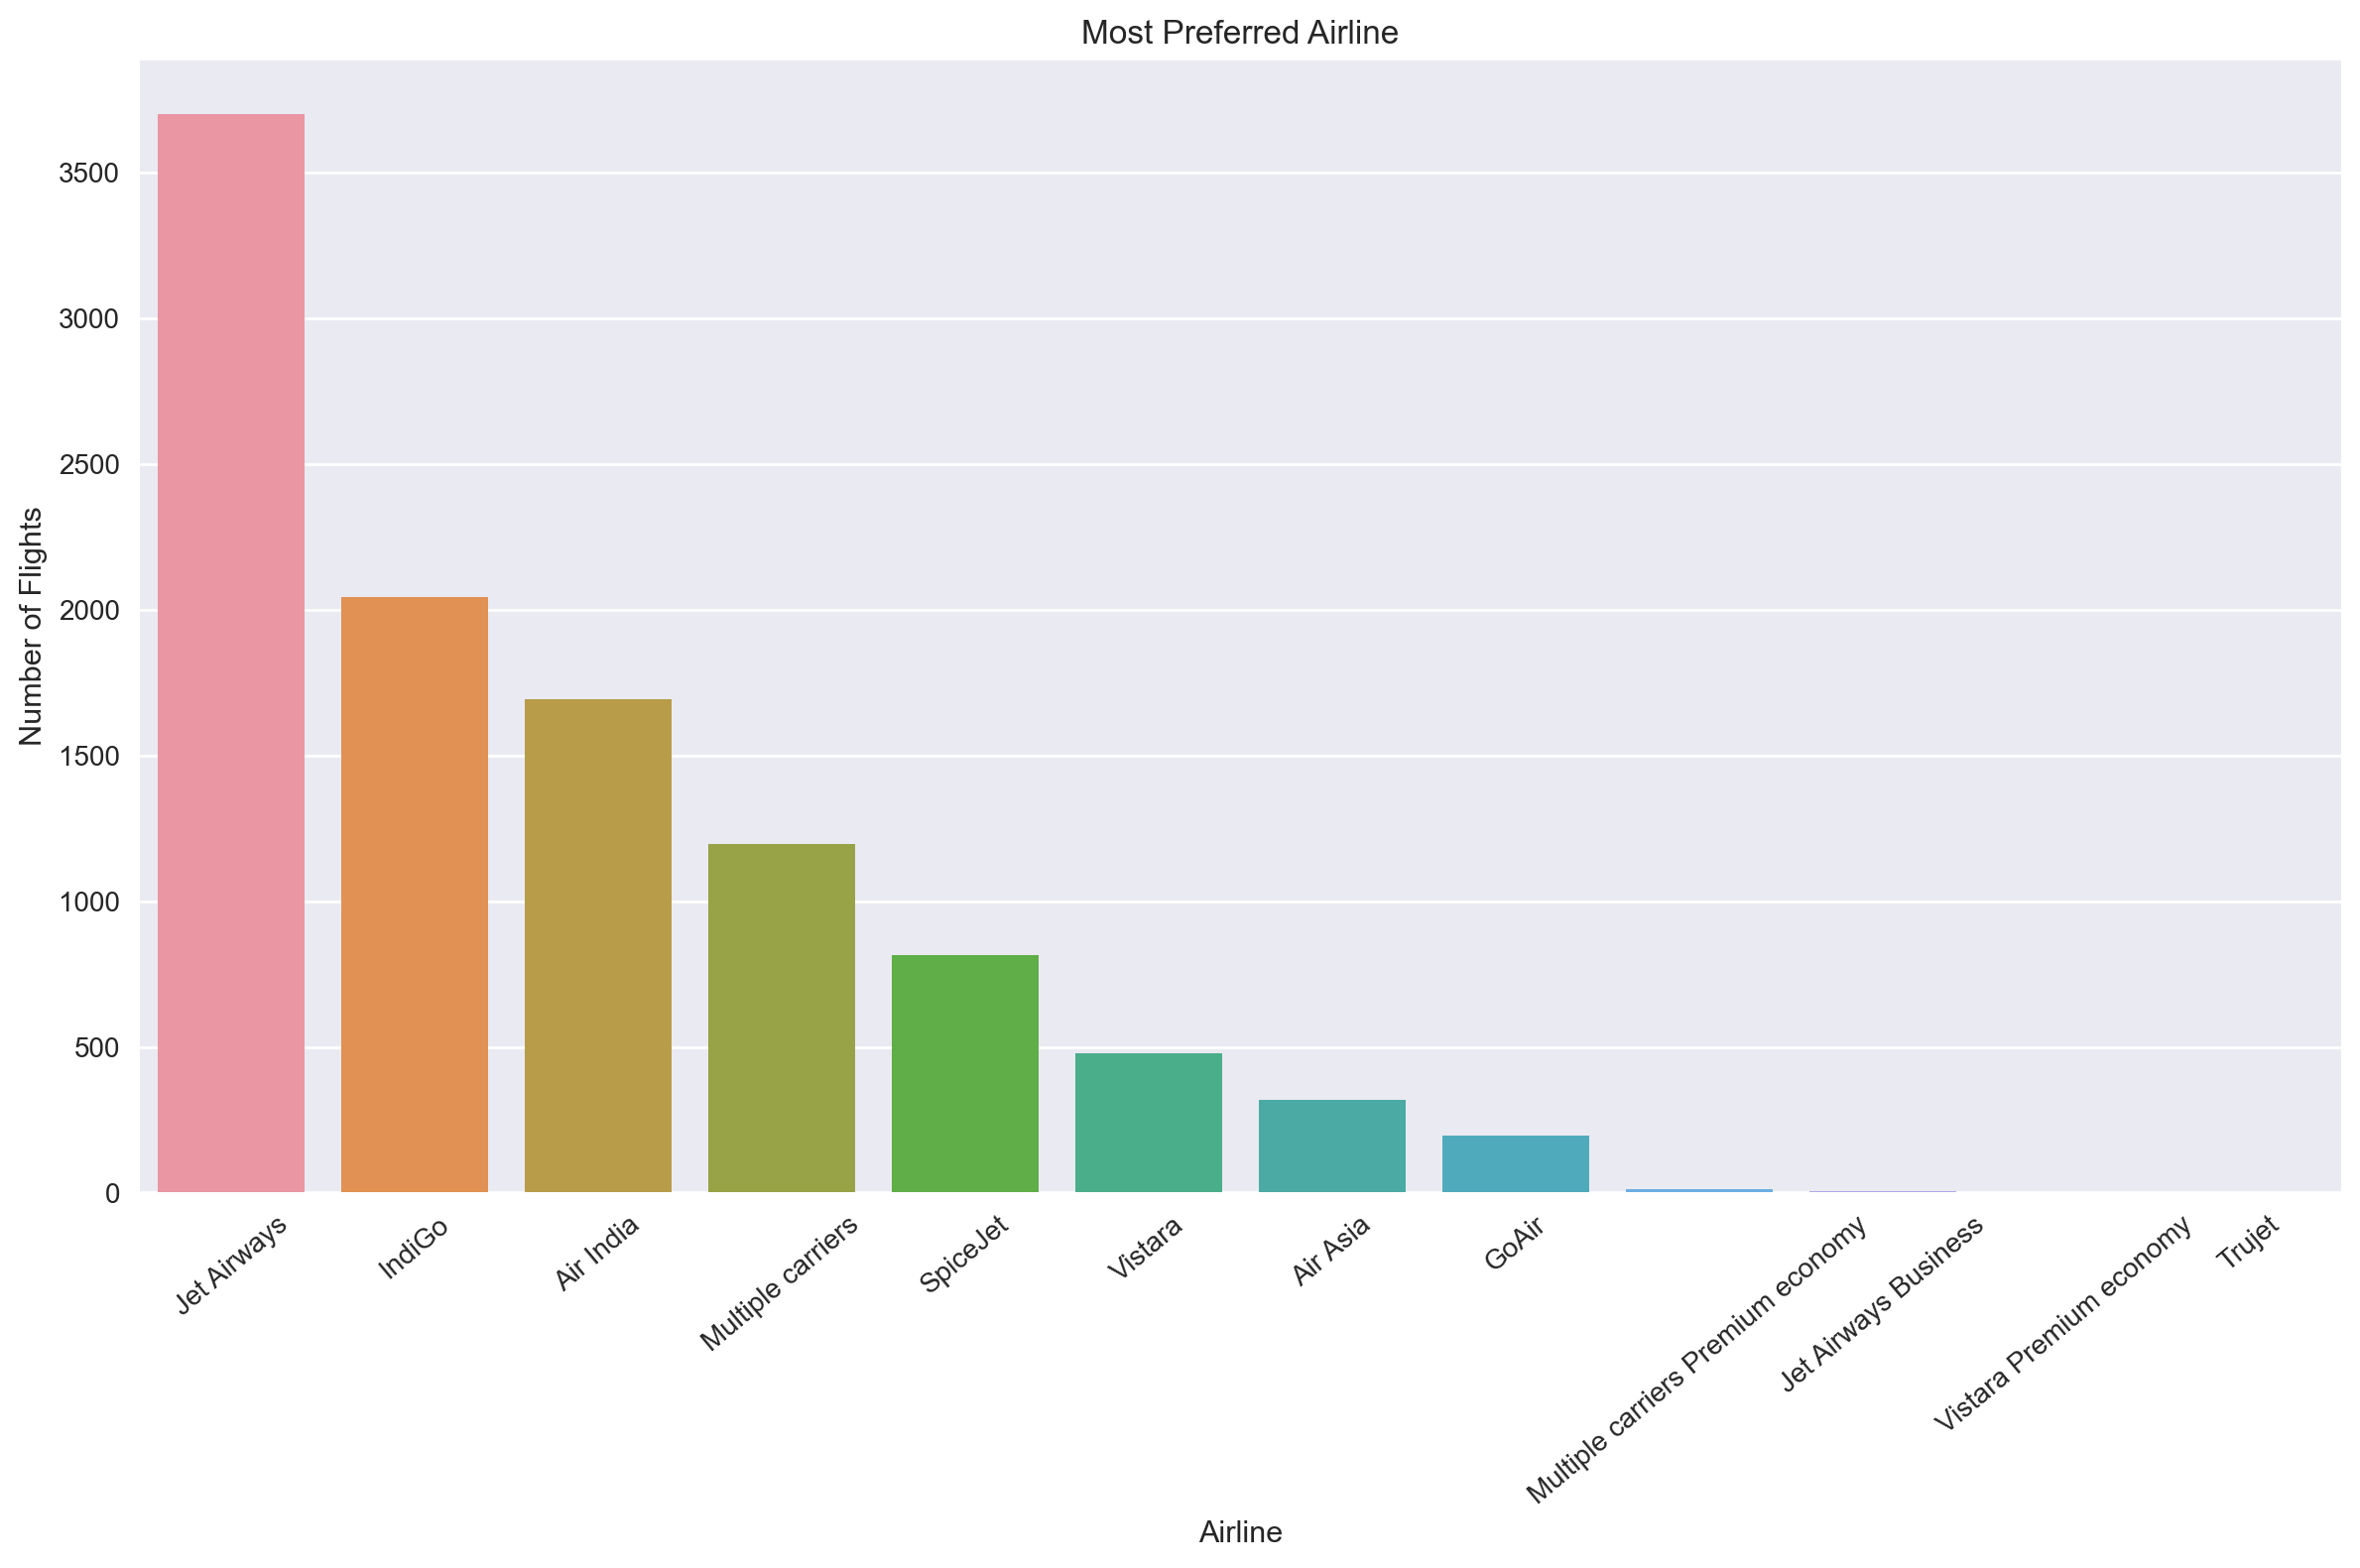

In [29]:
# Count the number of flights per airline
airline_counts = df_train['Airline'].value_counts()

# Plot a bar chart to visualize the preferred airline
plt.figure(figsize=(12, 8))
sns.barplot(x=airline_counts.index, y=airline_counts.values)
plt.title("Most Preferred Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.xticks(rotation=40)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

**The most preferred airline is : Jet Airways**

**B) Find the majority of the flights take off from which source.**

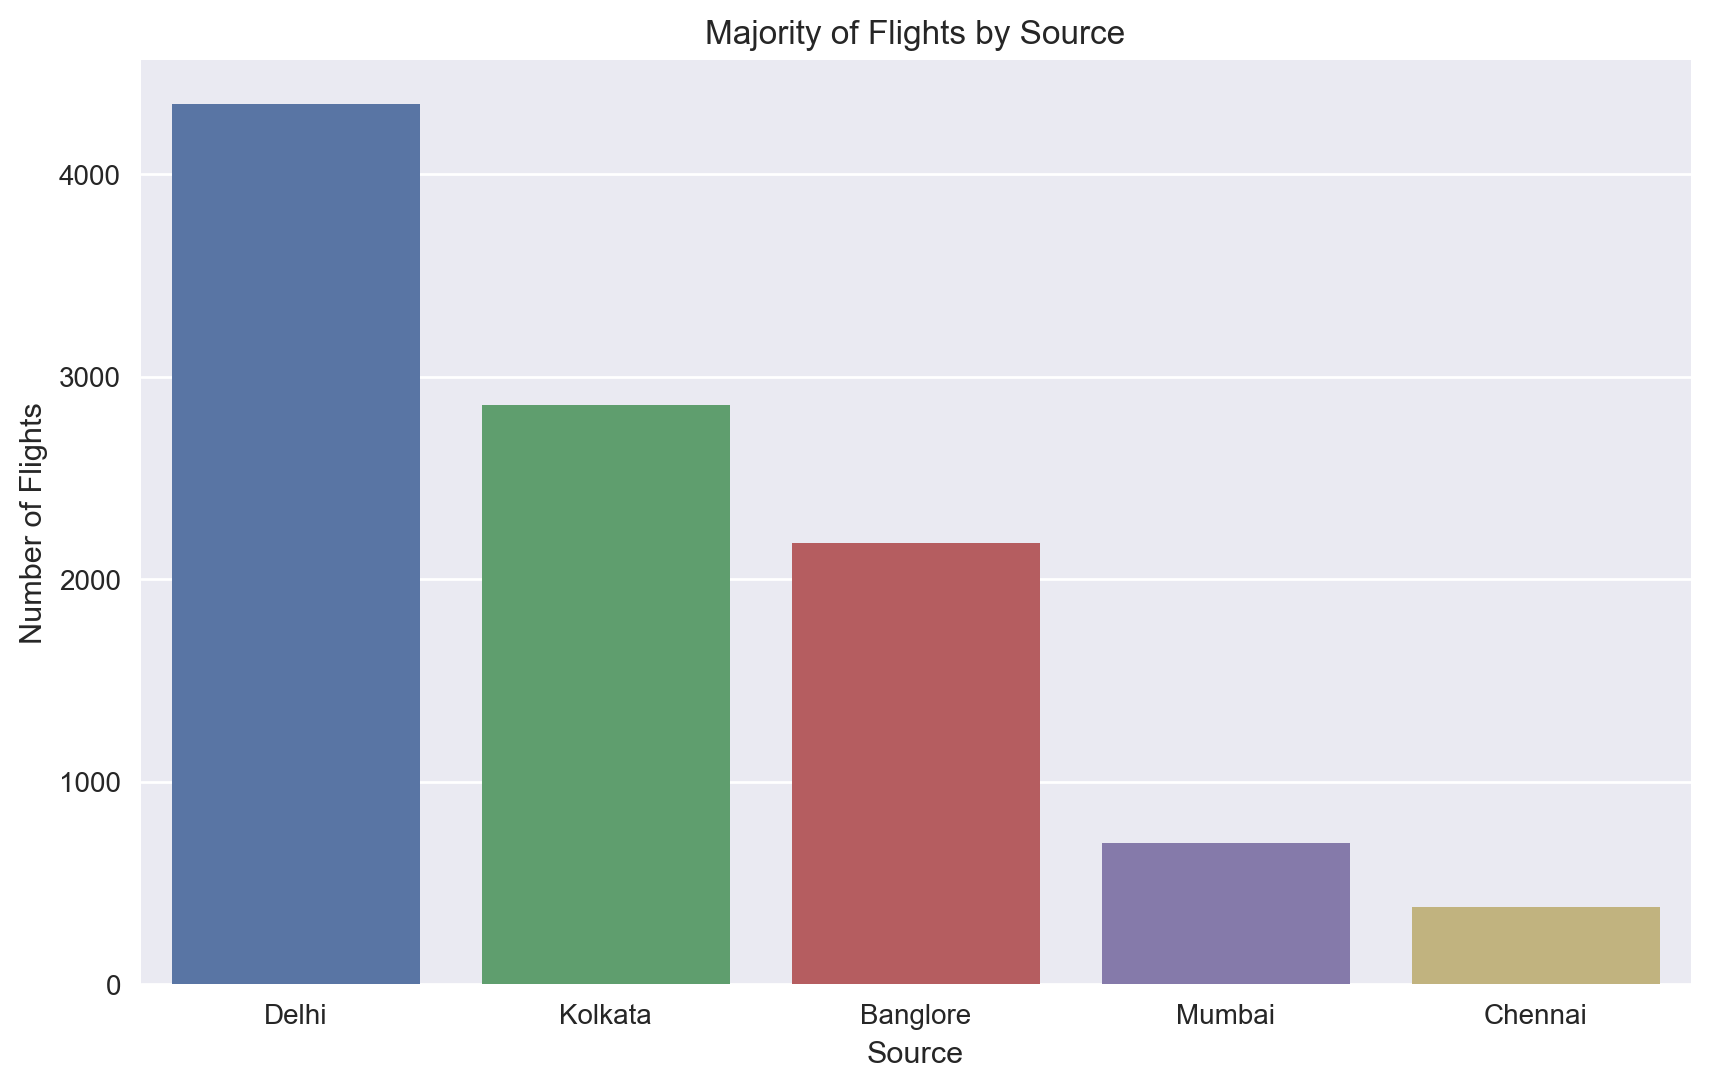

In [30]:
# Count the number of flights taking off from each source
source_counts = df_train['Source'].value_counts()

# Plot a bar chart to visualize the majority of flight sources
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values)
plt.title("Majority of Flights by Source")
plt.xlabel("Source")
plt.ylabel("Number of Flights")
plt.show()

**The majority of flights take off from : Delhi**

**C) Find maximum flights land in which destination.**

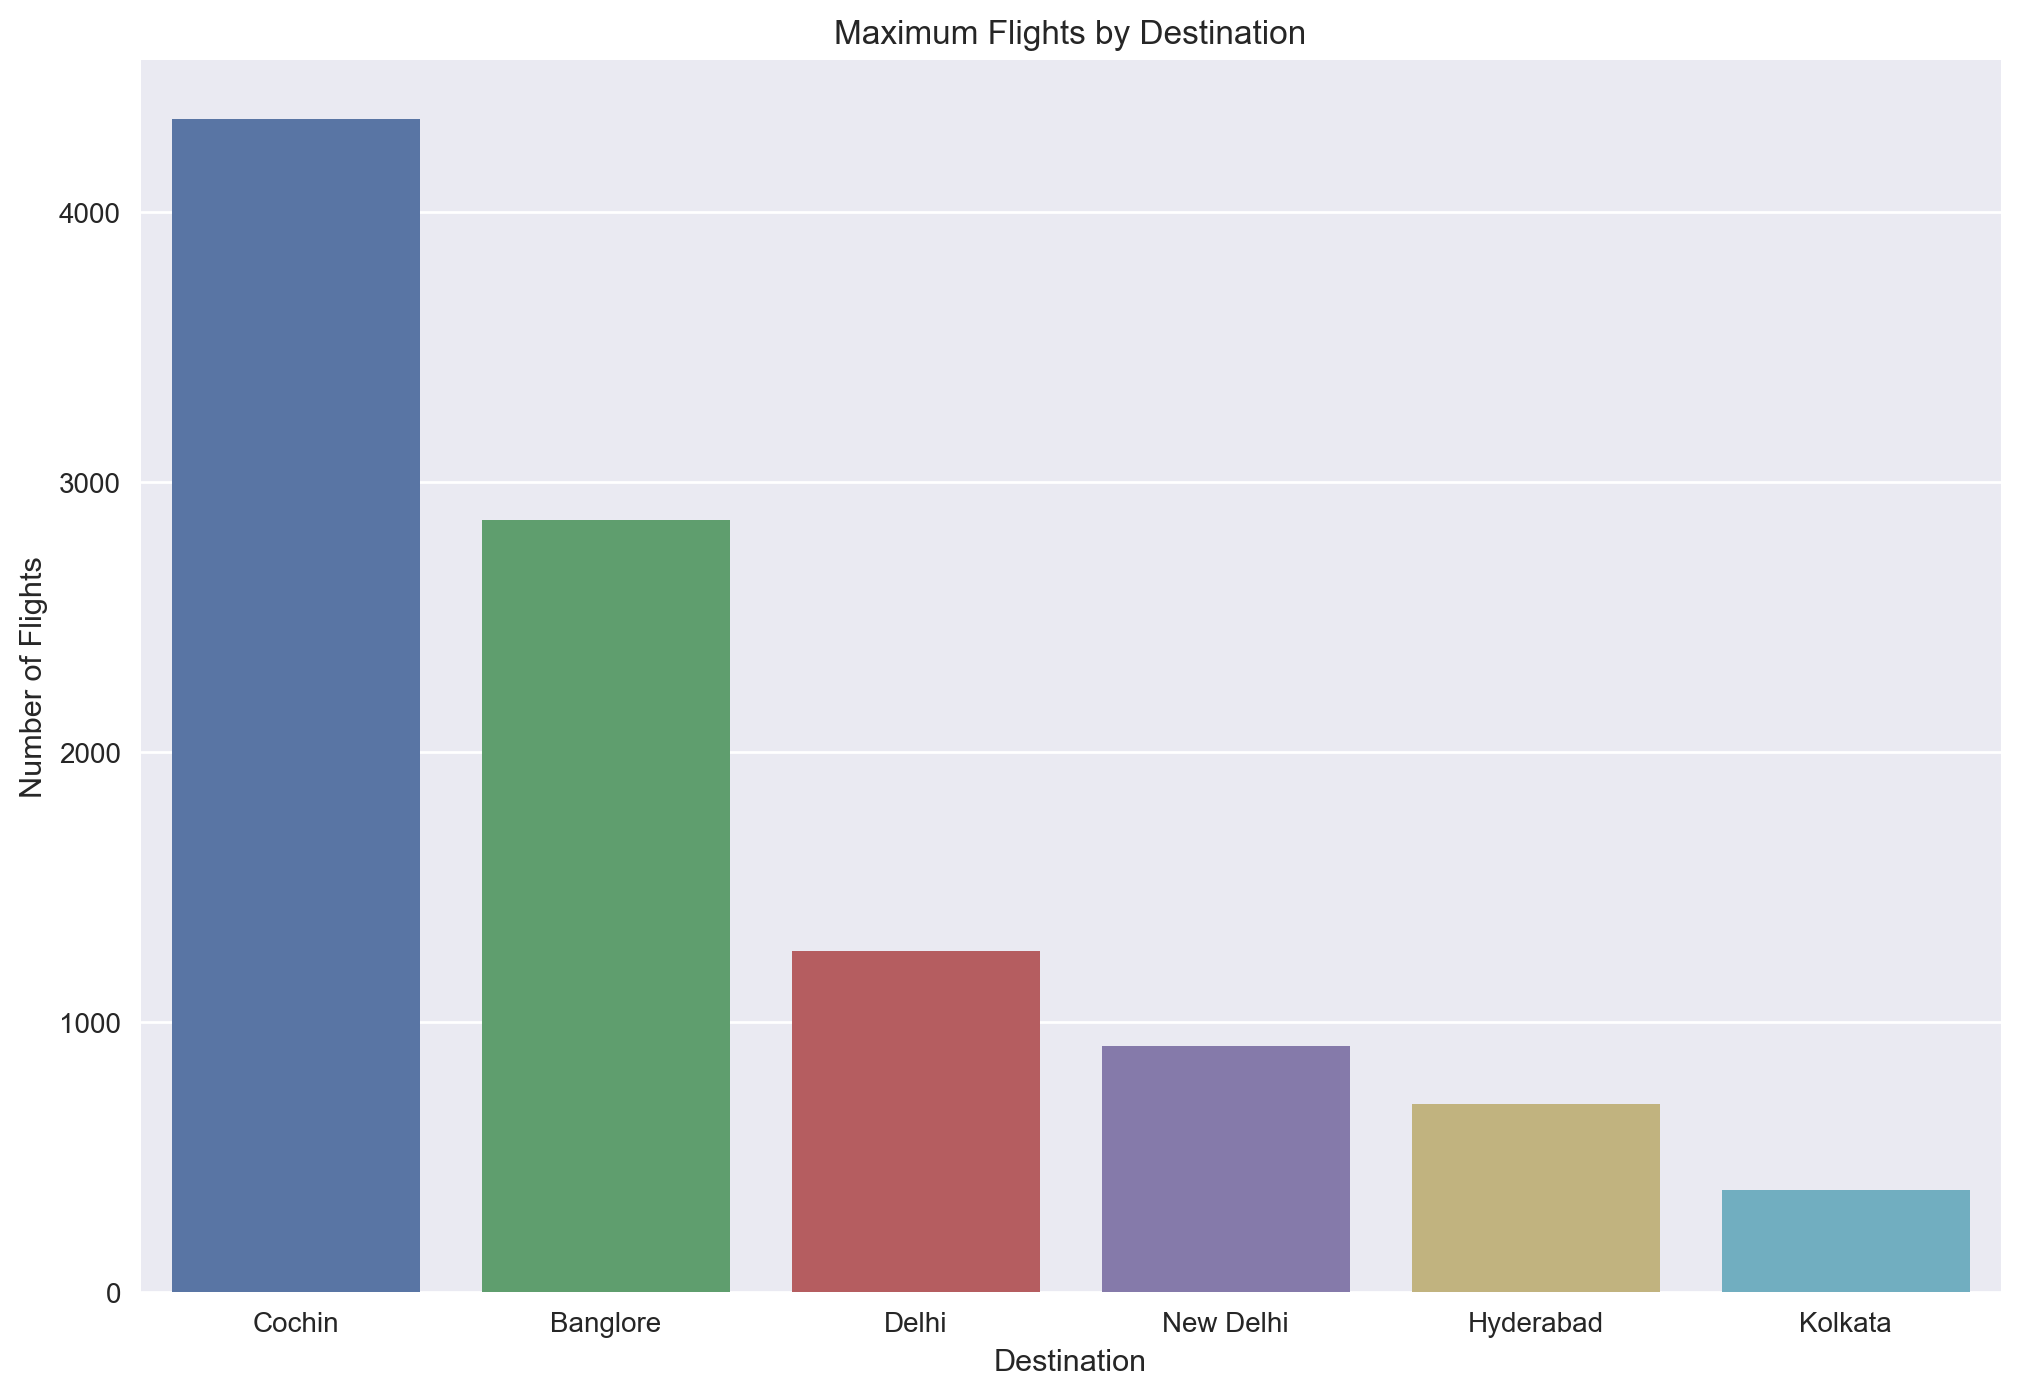

In [31]:
# Count the number of flights landing at each destination
destination_counts = df_train['Destination'].value_counts()

# Plot a bar chart to visualize the destination with the maximum flights
plt.figure(figsize=(12, 8))
sns.barplot(x=destination_counts.index, y=destination_counts.values)
plt.title("Maximum Flights by Destination")
plt.xlabel("Destination")
plt.ylabel("Number of Flights")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

**Maximum flights land in : Cochin**

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3. Compare independent features with Target feature to check the impact on price.
**A) Which airline has the highest price.**

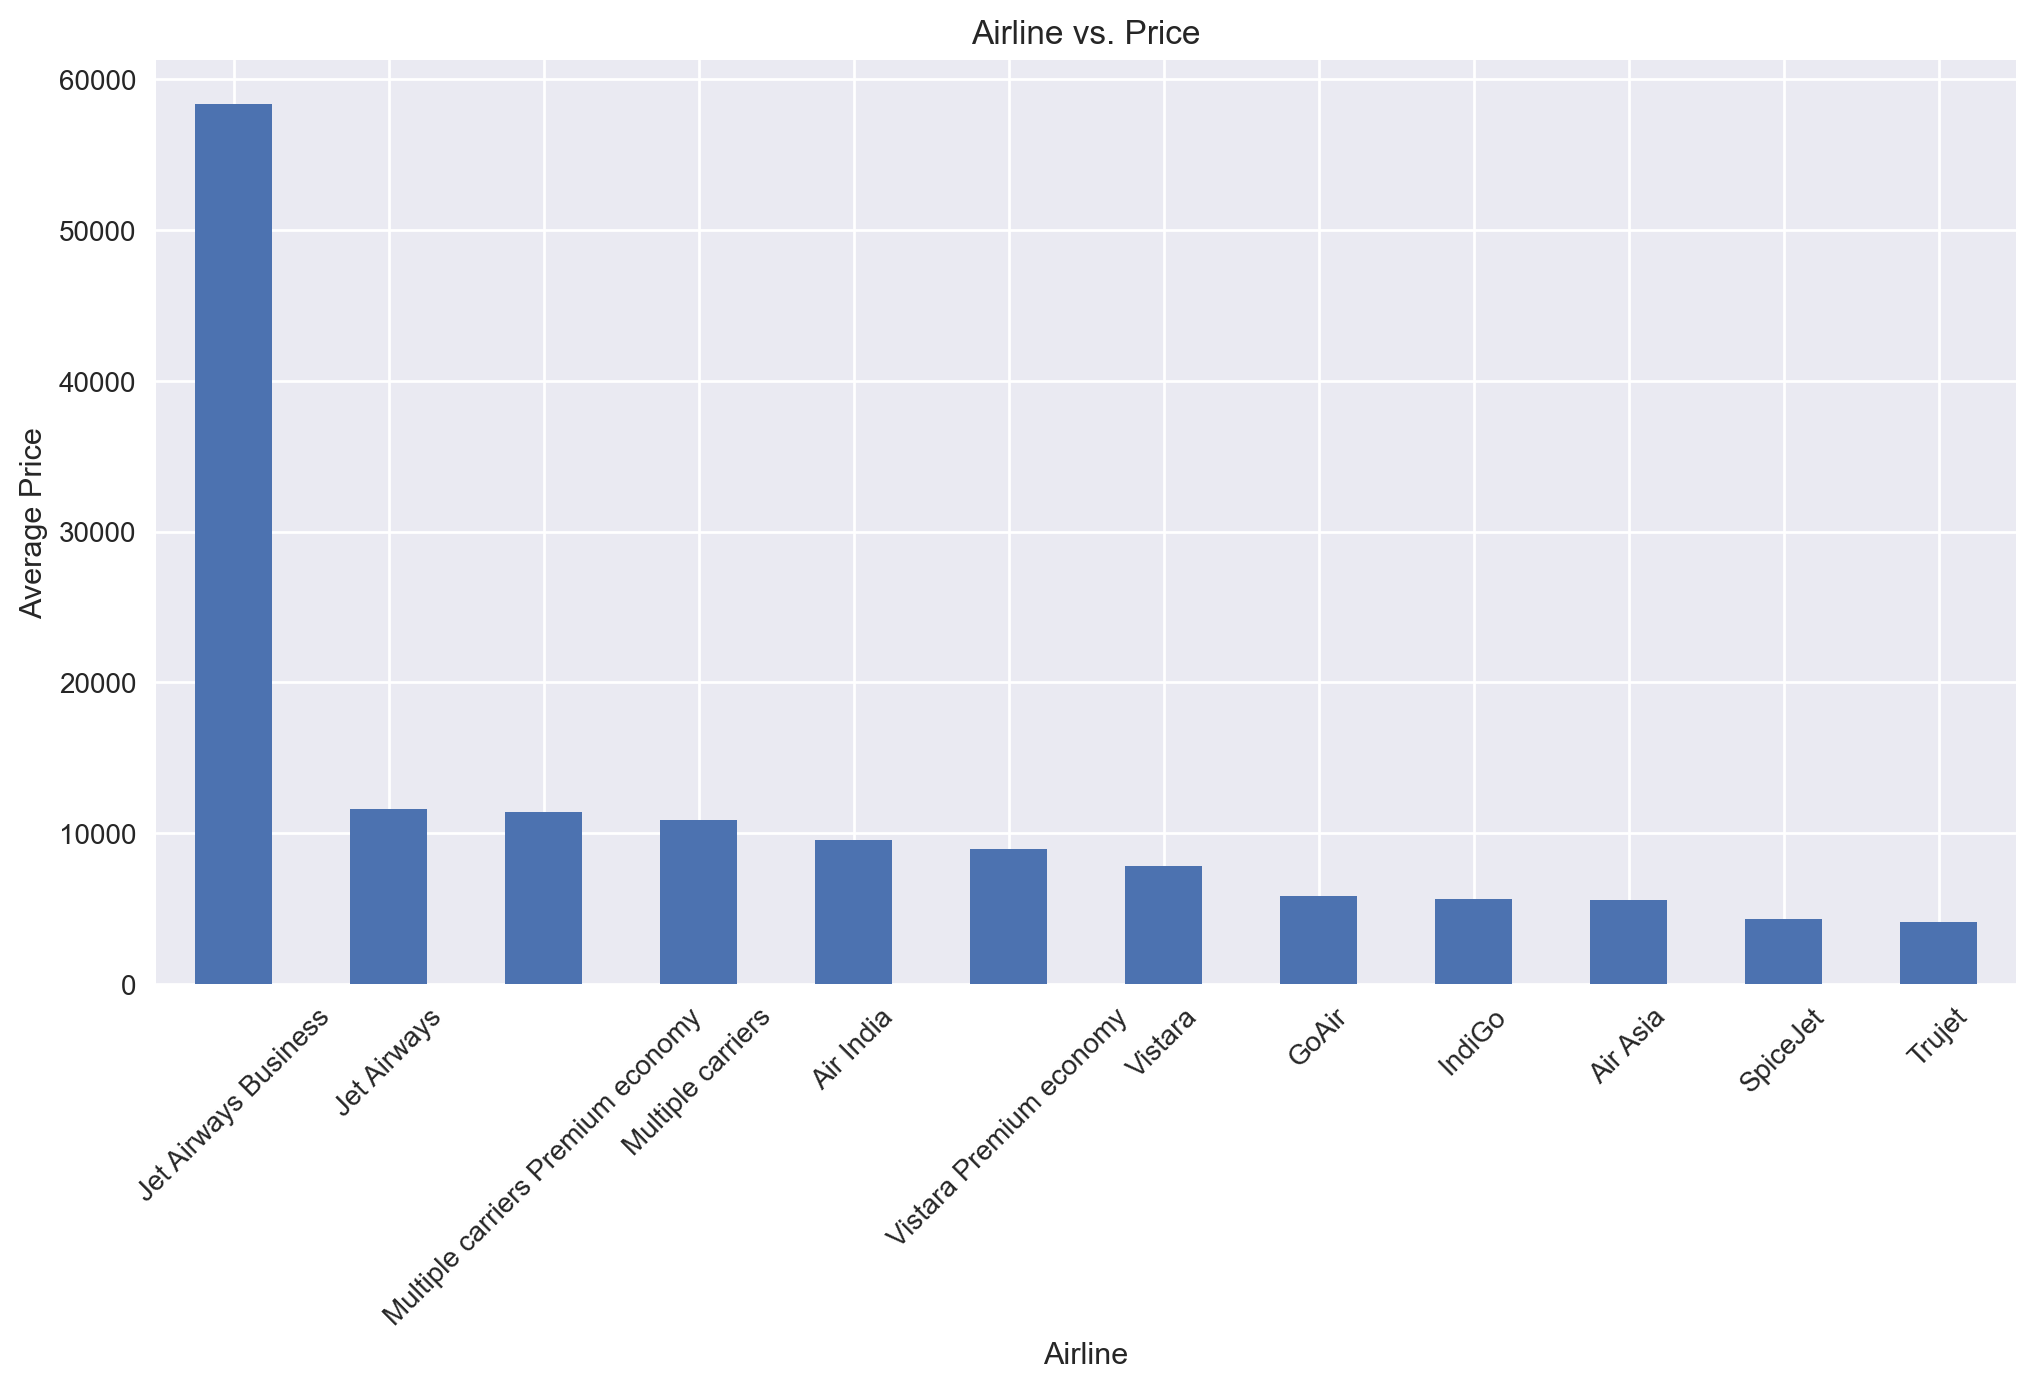

In [32]:
# Create a bar chart to compare airlines and their average prices
airline_prices = df_train.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
airline_prices.plot(kind='bar')
plt.title("Airline vs. Price")
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

The airline with the highest average price is Jet Airways Business with a price of 79512.

**B) Check if the business class flights are high price or low and find only those flights which price is higher than 50k.**

In [33]:
# Filter flights with prices higher than 50k
high_price_flights = df_train[df_train['Price'] > 50000]

# Display the flights with high prices
high_price_flights

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Minute,Hour,Day,Month,Year
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,300,1 stop,No info,52229,45,5,1,3,2019
1478,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,365,1 stop,No info,54826,40,18,18,3,2019
2618,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,375,1 stop,No info,54826,50,22,18,3,2019
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,340,1 stop,Business class,79512,45,5,1,3,2019
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,400,1 stop,Business class,62427,45,5,1,3,2019
5439,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,365,1 stop,No info,54826,55,16,1,3,2019
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,500,2 stops,No info,52285,5,20,6,3,2019
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,280,1 stop,Business class,57209,45,9,1,3,2019


In [34]:
df_train[(df_train['Additional_Info'] == "Business class")]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Minute,Hour,Day,Month,Year
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,340,1 stop,Business class,79512,45,5,1,3,2019
3032,Jet Airways,Banglore,New Delhi,BLR → BDQ → DEL,390,1 stop,Business class,28097,50,5,1,3,2019
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,400,1 stop,Business class,62427,45,5,1,3,2019
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,280,1 stop,Business class,57209,45,9,1,3,2019


In [35]:
df_train[(df_train['Airline'] == "Jet Airways Business")]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Minute,Hour,Day,Month,Year
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,300,1 stop,No info,52229,45,5,1,3,2019
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,340,1 stop,Business class,79512,45,5,1,3,2019
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,400,1 stop,Business class,62427,45,5,1,3,2019
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,500,2 stops,No info,46490,5,20,3,3,2019
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,500,2 stops,No info,52285,5,20,6,3,2019
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,280,1 stop,Business class,57209,45,9,1,3,2019


In [36]:
df_train[(df_train['Airline'] == "Vistara Premium economy")]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Minute,Hour,Day,Month,Year
426,Vistara Premium economy,Banglore,New Delhi,BLR → DEL,155,non-stop,No info,11793,0,16,3,3,2019
7657,Vistara Premium economy,Chennai,Kolkata,MAA → CCU,135,non-stop,No info,9125,5,7,1,3,2019
8615,Vistara Premium economy,Banglore,Delhi,BLR → DEL,170,non-stop,No info,5969,30,11,6,4,2019


In [37]:
df_train[(df_train['Airline'] == "Multiple carriers Premium economy")]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Minute,Hour,Day,Month,Year
717,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,705,1 stop,No info,10161,30,7,21,3,2019
1799,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,810,1 stop,No info,9845,30,7,21,3,2019
4627,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,620,1 stop,No info,10161,55,8,21,3,2019
4718,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,900,1 stop,No info,9845,0,6,21,3,2019
5090,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,440,1 stop,No info,11269,0,6,21,3,2019
5489,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,570,1 stop,No info,11269,0,6,21,3,2019
5673,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,770,1 stop,No info,14629,0,6,21,3,2019
5836,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,680,1 stop,No info,14629,30,7,21,3,2019
6470,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,725,1 stop,No info,9845,55,8,21,3,2019
6591,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,11269,55,8,21,3,2019


**Final Conclusion: "Jet Airways Business" having additional_info as "Business class" have the most expensive flights**

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 4. Perform encoding for the required features according to the data

In [38]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Minute', 'Hour', 'Day', 'Month', 'Year'],
      dtype='object')

In [39]:
df_test.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Minute', 'Hour', 'Day', 'Month', 'Year'],
      dtype='object')

In [40]:
columns_to_encode = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

# Using function to label encode categorical columns of train data.

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    label_mapping_train = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    df_test[column] = label_encoder.transform(df_test[column])
    label_mapping_test = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    
    print(f'Feature: {column}\n')
    print('Mapping_Train:', label_mapping_train,"\n")
    print('Mapping_Test:', label_mapping_test, "\n\n\n")

Feature: Airline

Mapping_Train: {'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4, 'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7, 'SpiceJet': 8, 'Trujet': 9, 'Vistara': 10, 'Vistara Premium economy': 11} 

Mapping_Test: {'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4, 'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7, 'SpiceJet': 8, 'Trujet': 9, 'Vistara': 10, 'Vistara Premium economy': 11} 



Feature: Source

Mapping_Train: {'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4} 

Mapping_Test: {'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4} 



Feature: Destination

Mapping_Train: {'Banglore': 0, 'Cochin': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'New Delhi': 5} 

Mapping_Test: {'Banglore': 0, 'Cochin': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'New Delhi': 5} 



Feature: Total_Stops

Mapping_Train: {'1 stop'

In [41]:
df_train.dtypes

Airline             int32
Source              int32
Destination         int32
Route              object
Duration            int64
Total_Stops         int32
Additional_Info     int32
Price               int64
Minute              int32
Hour                int32
Day                 int32
Month               int32
Year                int32
dtype: object

In [42]:
df_train.dtypes

Airline             int32
Source              int32
Destination         int32
Route              object
Duration            int64
Total_Stops         int32
Additional_Info     int32
Price               int64
Minute              int32
Hour                int32
Day                 int32
Month               int32
Year                int32
dtype: object

### We will use One-Hot Encoder for "Route" column

In [43]:
from sklearn.preprocessing import OneHotEncoder

# Assuming you have train and test DataFrames
train_data = df_train['Route'].values.reshape(-1, 1)
test_data = df_test['Route'].values.reshape(-1, 1)

# Create a OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the train data
train_encoded = encoder.fit_transform(train_data)

# Transform the test data using the same encoder
test_encoded = encoder.transform(test_data)

# Convert the encoded sparse matrices to arrays if needed
train_encoded_array = train_encoded.toarray()
test_encoded_array = test_encoded.toarray()

In [44]:
# Create DataFrames for encoded train and test data
train_encoded_df = pd.DataFrame(train_encoded_array, columns=encoder.get_feature_names_out(['Route']))
test_encoded_df = pd.DataFrame(test_encoded_array, columns=encoder.get_feature_names_out(['Route']))

# Reseting index to avoid generation of NaN values
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Concatenate the encoded data with the original DataFrames
df_train = pd.concat([df_train, train_encoded_df], axis=1)
df_test = pd.concat([df_test, test_encoded_df], axis=1)

print(df_train.shape)
print(df_test.shape)

(10462, 141)
(2645, 140)


In [45]:
# Finally, we will drop the 'Route' column from train and test datasets

df_train.drop('Route', axis=1, inplace=True)
df_test.drop('Route', axis=1, inplace=True)

In [46]:
print(df_train.shape)
df_train.head()

(10462, 140)


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Minute,Hour,Day,Month,Year,Route_BLR → AMD → DEL,Route_BLR → BBI → DEL,Route_BLR → BDQ → DEL,Route_BLR → BOM → AMD → DEL,Route_BLR → BOM → BHO → DEL,Route_BLR → BOM → DEL,Route_BLR → BOM → IDR → DEL,Route_BLR → BOM → IDR → GWL → DEL,Route_BLR → BOM → IXC → DEL,Route_BLR → BOM → JDH → DEL,Route_BLR → BOM → NAG → DEL,Route_BLR → BOM → UDR → DEL,Route_BLR → CCU → BBI → DEL,Route_BLR → CCU → BBI → HYD → DEL,Route_BLR → CCU → BBI → HYD → VGA → DEL,Route_BLR → CCU → DEL,Route_BLR → CCU → GAU → DEL,Route_BLR → COK → DEL,Route_BLR → DEL,Route_BLR → GAU → DEL,Route_BLR → GOI → DEL,Route_BLR → HBX → BOM → AMD → DEL,Route_BLR → HBX → BOM → BHO → DEL,Route_BLR → HBX → BOM → NAG → DEL,Route_BLR → HYD → DEL,Route_BLR → HYD → VGA → DEL,Route_BLR → IDR → DEL,Route_BLR → LKO → DEL,Route_BLR → MAA → DEL,Route_BLR → NAG → DEL,Route_BLR → PNQ → DEL,Route_BLR → STV → DEL,Route_BLR → TRV → COK → DEL,Route_BLR → VGA → DEL,Route_BLR → VGA → HYD → DEL,Route_BLR → VGA → VTZ → DEL,Route_BOM → AMD → ISK → HYD,Route_BOM → BBI → HYD,Route_BOM → BDQ → DEL → HYD,Route_BOM → BHO → DEL → HYD,Route_BOM → BLR → CCU → BBI → HYD,Route_BOM → BLR → HYD,Route_BOM → CCU → HYD,Route_BOM → COK → MAA → HYD,Route_BOM → DED → DEL → HYD,Route_BOM → DEL → HYD,Route_BOM → GOI → HYD,Route_BOM → GOI → PNQ → HYD,Route_BOM → HYD,Route_BOM → IDR → DEL → HYD,Route_BOM → JAI → DEL → HYD,Route_BOM → JDH → DEL → HYD,Route_BOM → JDH → JAI → DEL → HYD,Route_BOM → JLR → HYD,Route_BOM → MAA → HYD,Route_BOM → NDC → HYD,Route_BOM → RPR → VTZ → HYD,Route_BOM → UDR → DEL → HYD,Route_BOM → VNS → DEL → HYD,Route_CCU → AMD → BLR,Route_CCU → BBI → BLR,Route_CCU → BBI → BOM → BLR,Route_CCU → BBI → HYD → BLR,Route_CCU → BBI → IXR → DEL → BLR,Route_CCU → BLR,Route_CCU → BOM → AMD → BLR,Route_CCU → BOM → BLR,Route_CCU → BOM → COK → BLR,Route_CCU → BOM → GOI → BLR,Route_CCU → BOM → HBX → BLR,Route_CCU → BOM → PNQ → BLR,Route_CCU → BOM → TRV → BLR,Route_CCU → DEL → AMD → BLR,Route_CCU → DEL → BLR,Route_CCU → DEL → COK → BLR,Route_CCU → DEL → COK → TRV → BLR,Route_CCU → DEL → VGA → BLR,Route_CCU → GAU → BLR,Route_CCU → GAU → DEL → BLR,Route_CCU → GAU → IMF → DEL → BLR,Route_CCU → HYD → BLR,Route_CCU → IXA → BLR,Route_CCU → IXB → BLR,Route_CCU → IXB → DEL → BLR,Route_CCU → IXR → BBI → BLR,Route_CCU → IXR → DEL → BLR,Route_CCU → IXZ → MAA → BLR,Route_CCU → JAI → BOM → BLR,Route_CCU → JAI → DEL → BLR,Route_CCU → KNU → BLR,Route_CCU → MAA → BLR,Route_CCU → NAG → BLR,Route_CCU → PAT → BLR,Route_CCU → PNQ → BLR,Route_CCU → RPR → HYD → BLR,Route_CCU → VNS → DEL → BLR,Route_CCU → VTZ → BLR,Route_DEL → AMD → BOM → COK,Route_DEL → AMD → COK,Route_DEL → ATQ → BOM → COK,Route_DEL → BBI → COK,Route_DEL → BDQ → BOM → COK,Route_DEL → BHO → BOM → COK,Route_DEL → BLR → COK,Route_DEL → BOM → COK,Route_DEL → CCU → BOM → COK,Route_DEL → COK,Route_DEL → DED → BOM → COK,Route_DEL → GOI → BOM → COK,Route_DEL → GWL → IDR → BOM → COK,Route_DEL → HYD → BOM → COK,Route_DEL → HYD → COK,Route_DEL → HYD → MAA → COK,Route_DEL → IDR → BOM → COK,Route_DEL → IXC → BOM → COK,Route_DEL → IXU → BOM → COK,Route_DEL → JAI → BOM → COK,Route_DEL → JDH → BOM → COK,Route_DEL → LKO → BOM → COK,Route_DEL → LKO → COK,Route_DEL → MAA → BOM → COK,Route_DEL → MAA → COK,Route_DEL → NAG → BOM → COK,Route_DEL → PNQ → COK,Route_DEL → RPR → NAG → BOM → COK,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU
0,3,0,5,170,4,7,3897,20,22,24,3,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,0,445,1,7,7662,50,5,1

In [47]:
print(df_test.shape)
df_test.head()

(2645, 139)


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Minute,Hour,Day,Month,Year,Route_BLR → AMD → DEL,Route_BLR → BBI → DEL,Route_BLR → BDQ → DEL,Route_BLR → BOM → AMD → DEL,Route_BLR → BOM → BHO → DEL,Route_BLR → BOM → DEL,Route_BLR → BOM → IDR → DEL,Route_BLR → BOM → IDR → GWL → DEL,Route_BLR → BOM → IXC → DEL,Route_BLR → BOM → JDH → DEL,Route_BLR → BOM → NAG → DEL,Route_BLR → BOM → UDR → DEL,Route_BLR → CCU → BBI → DEL,Route_BLR → CCU → BBI → HYD → DEL,Route_BLR → CCU → BBI → HYD → VGA → DEL,Route_BLR → CCU → DEL,Route_BLR → CCU → GAU → DEL,Route_BLR → COK → DEL,Route_BLR → DEL,Route_BLR → GAU → DEL,Route_BLR → GOI → DEL,Route_BLR → HBX → BOM → AMD → DEL,Route_BLR → HBX → BOM → BHO → DEL,Route_BLR → HBX → BOM → NAG → DEL,Route_BLR → HYD → DEL,Route_BLR → HYD → VGA → DEL,Route_BLR → IDR → DEL,Route_BLR → LKO → DEL,Route_BLR → MAA → DEL,Route_BLR → NAG → DEL,Route_BLR → PNQ → DEL,Route_BLR → STV → DEL,Route_BLR → TRV → COK → DEL,Route_BLR → VGA → DEL,Route_BLR → VGA → HYD → DEL,Route_BLR → VGA → VTZ → DEL,Route_BOM → AMD → ISK → HYD,Route_BOM → BBI → HYD,Route_BOM → BDQ → DEL → HYD,Route_BOM → BHO → DEL → HYD,Route_BOM → BLR → CCU → BBI → HYD,Route_BOM → BLR → HYD,Route_BOM → CCU → HYD,Route_BOM → COK → MAA → HYD,Route_BOM → DED → DEL → HYD,Route_BOM → DEL → HYD,Route_BOM → GOI → HYD,Route_BOM → GOI → PNQ → HYD,Route_BOM → HYD,Route_BOM → IDR → DEL → HYD,Route_BOM → JAI → DEL → HYD,Route_BOM → JDH → DEL → HYD,Route_BOM → JDH → JAI → DEL → HYD,Route_BOM → JLR → HYD,Route_BOM → MAA → HYD,Route_BOM → NDC → HYD,Route_BOM → RPR → VTZ → HYD,Route_BOM → UDR → DEL → HYD,Route_BOM → VNS → DEL → HYD,Route_CCU → AMD → BLR,Route_CCU → BBI → BLR,Route_CCU → BBI → BOM → BLR,Route_CCU → BBI → HYD → BLR,Route_CCU → BBI → IXR → DEL → BLR,Route_CCU → BLR,Route_CCU → BOM → AMD → BLR,Route_CCU → BOM → BLR,Route_CCU → BOM → COK → BLR,Route_CCU → BOM → GOI → BLR,Route_CCU → BOM → HBX → BLR,Route_CCU → BOM → PNQ → BLR,Route_CCU → BOM → TRV → BLR,Route_CCU → DEL → AMD → BLR,Route_CCU → DEL → BLR,Route_CCU → DEL → COK → BLR,Route_CCU → DEL → COK → TRV → BLR,Route_CCU → DEL → VGA → BLR,Route_CCU → GAU → BLR,Route_CCU → GAU → DEL → BLR,Route_CCU → GAU → IMF → DEL → BLR,Route_CCU → HYD → BLR,Route_CCU → IXA → BLR,Route_CCU → IXB → BLR,Route_CCU → IXB → DEL → BLR,Route_CCU → IXR → BBI → BLR,Route_CCU → IXR → DEL → BLR,Route_CCU → IXZ → MAA → BLR,Route_CCU → JAI → BOM → BLR,Route_CCU → JAI → DEL → BLR,Route_CCU → KNU → BLR,Route_CCU → MAA → BLR,Route_CCU → NAG → BLR,Route_CCU → PAT → BLR,Route_CCU → PNQ → BLR,Route_CCU → RPR → HYD → BLR,Route_CCU → VNS → DEL → BLR,Route_CCU → VTZ → BLR,Route_DEL → AMD → BOM → COK,Route_DEL → AMD → COK,Route_DEL → ATQ → BOM → COK,Route_DEL → BBI → COK,Route_DEL → BDQ → BOM → COK,Route_DEL → BHO → BOM → COK,Route_DEL → BLR → COK,Route_DEL → BOM → COK,Route_DEL → CCU → BOM → COK,Route_DEL → COK,Route_DEL → DED → BOM → COK,Route_DEL → GOI → BOM → COK,Route_DEL → GWL → IDR → BOM → COK,Route_DEL → HYD → BOM → COK,Route_DEL → HYD → COK,Route_DEL → HYD → MAA → COK,Route_DEL → IDR → BOM → COK,Route_DEL → IXC → BOM → COK,Route_DEL → IXU → BOM → COK,Route_DEL → JAI → BOM → COK,Route_DEL → JDH → BOM → COK,Route_DEL → LKO → BOM → COK,Route_DEL → LKO → COK,Route_DEL → MAA → BOM → COK,Route_DEL → MAA → COK,Route_DEL → NAG → BOM → COK,Route_DEL → PNQ → COK,Route_DEL → RPR → NAG → BOM → COK,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU
0,4,2,1,655,0,7,30,17,6,6,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,3,0,240,0,7,20,6,12,5,2019,0.0,0.0,

### Creating new Dataframe

In [48]:
train_df_1 = df_train
test_df_1 = df_test

### Defining X & Y

In [49]:
#Separating into features variables and target variable.

X = df_train.drop(columns=['Price'])  # Features
Y = df_train['Price']  # Target variable
print(Y.shape)
print(X.shape)

(10462,)
(10462, 139)


In [50]:
#P has been defined using testing data

P = test_df_1
print("Shape of testing dataset:", P.shape)

Shape of testing dataset: (2645, 139)


### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 5. Build multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest etc. and check the performance of your model

**Building a Random Forest Classifier model to check feature importance**

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into test and train data sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Creating a model object.
model_DecisionTree = RandomForestClassifier(n_estimators=100, random_state=10)

# Fitting the data into our model and predicting the values.
model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

# Building a DataFrame to view the feature importance and sort for better visualization.
feature_imp = pd.DataFrame()
feature_imp["Feature"] = train_df_1.drop(["Price"], axis=1).columns
feature_imp["Importance"] = model_DecisionTree.feature_importances_

# Sorting the DataFrame by importance
feature_imp_sorted = feature_imp.sort_values("Importance", ascending=False)

# Applying styling to hide the index
styled_feature_imp = feature_imp_sorted.style.set_table_styles([{'selector': 'tr:hover','props': [('background-color', '')]}])

# Displaying the styled DataFrame
styled_feature_imp

,Feature,Importance
8,Day,0.242041
3,Duration,0.175805
9,Month,0.117448
7,Hour,0.114143
6,Minute,0.089534
0,Airline,0.077833
5,Additional_Info,0.060904
2,Destination,0.012295
4,Total_Stops,0.008907
1,Source,0.008148


### Creating a model pipeline

In [52]:
# Defining multiple Regression models

models = [
#   LinearRegression(), our data is high demesional so we refrain from using linear regression.
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=10),
    RandomForestRegressor(n_estimators=100, random_state=10),
    ExtraTreesRegressor(n_estimators=100, random_state=10),
    GradientBoostingRegressor(n_estimators=100, random_state=10)  
]

In [53]:
def calculate_adj_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Train and evaluate each model
for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    adj_r2 = calculate_adj_r2(r2, len(Y_test), 1)  # Adjusted R-squared for one feature
    rmse = np.sqrt(mse)
    
    print(f"Model: {type(model).__name__}")
    print(f'R-squared: {r2:.4f}')
    print(f'Adjusted R-squared: {adj_r2:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print("----------------------")

Model: KNeighborsRegressor
R-squared: 0.6071
Adjusted R-squared: 0.6070
RMSE: 2888.3091
----------------------
Model: DecisionTreeRegressor
R-squared: 0.8452
Adjusted R-squared: 0.8451
RMSE: 1813.2777
----------------------
Model: RandomForestRegressor
R-squared: 0.9334
Adjusted R-squared: 0.9333
RMSE: 1189.6112
----------------------
Model: ExtraTreesRegressor
R-squared: 0.9298
Adjusted R-squared: 0.9298
RMSE: 1220.9050
----------------------
Model: GradientBoostingRegressor
R-squared: 0.8444
Adjusted R-squared: 0.8444
RMSE: 1817.4930
----------------------


In [54]:
min(df_train.Price)

1759

**RandomForestRegressor is the best model for the given data with Rsquared = 0.9334. which means 93% of variablity in price is explained by the given features.**

## Part 2 :  RFM

## RFM Analysis

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:

**Recency**: How recently a customer has made a purchase

**Frequency**: How often a customer makes a purchase

**Monetary** Value: How much money a customer spends on purchases

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

![](https://d35fo82fjcw0y8.cloudfront.net/2018/03/01013508/Incontent_image.png)

In [55]:
df2 = pd.read_csv(r"C:\Users\ASUS\RFM data.csv")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Preparing RFM Table

In [56]:
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

print("Min date: {} \nMax date: {}".format(df2.InvoiceDate.min(), df2.InvoiceDate.max()))

Min date: 2010-12-01 08:26:00 
Max date: 2011-12-09 12:50:00


In [57]:
last_day = df2.InvoiceDate.max() + dt.timedelta(days = 1)

In [58]:
rfm_table = df2.groupby("CustomerID").agg({"InvoiceDate": lambda x: (last_day - x.max()).days,
                                          "InvoiceNo": "nunique",
                                          "TotalPrice": "sum"})

rfm_table.rename(columns = {"InvoiceDate": "Recency",
                            "InvoiceNo": "Frequency",
                            "TotalPrice": "Monetary"}, inplace = True)

rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,7,4060.40
12348.0,75,4,1437.24
12349.0,19,1,1417.60
12350.0,310,1,294.40
12352.0,36,7,1385.74


In [59]:
r_labels = range(5, 0, -1)
fm_labels = range(1, 6)

rfm_table["R"] = pd.qcut(rfm_table["Recency"], 5, labels = r_labels)
rfm_table["F"] = pd.qcut(rfm_table["Frequency"].rank(method = 'first'), 5, labels = fm_labels)
rfm_table["M"] = pd.qcut(rfm_table["Monetary"], 5, labels = fm_labels)

rfm_table.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,7,4060.40,5,5,5
12348.0,75,4,1437.24,2,4,4
12349.0,19,1,1417.60,4,1,4
12350.0,310,1,294.40,1,1,2
12352.0,36,7,1385.74,3,5,4


In [60]:
rfm_table["RFM_Segment"] = rfm_table["R"].astype(str) + rfm_table["F"].astype(str) + rfm_table["M"].astype(str)
rfm_table["RFM_Score"] = rfm_table[["R", "F", "M"]].sum(axis = 1)

rfm_table.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,2,7,4060.40,5,5,5,555,15
12348.0,75,4,1437.24,2,4,4,244,10
12349.0,19,1,1417.60,4,1,4,414,9
12350.0,310,1,294.40,1,1,2,112,4
12352.0,36,7,1385.74,3,5,4,354,12


# RFM Segments

**Champions**: Bought recently, buy often and spend the most

**Loyal customers**: Buy on a regular basis. Responsive to promotions.

**Potential loyalist**: Recent customers with average frequency.

**Recent customers**: Bought most recently, but not often.

**Promising**: Recent shoppers, but haven’t spent much.

**Needs attention**: Above average recency, frequency and monetary values. May not have bought very recently though.

**About to sleep**: Below average recency and frequency. Will lose them if not reactivated.

**At risk**: Some time since they’ve purchased. Need to bring them back!

**Can’t lose them**: Used to purchase frequently but haven’t returned for a long time.

**Hibernating**: Last purchase was long back and low number of orders. May be lost.

In [61]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': 'Cannot lose them',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
rfm_table['Segment'] = rfm_table['R'].astype(str) + rfm_table['F'].astype(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(segt_map, regex=True)
rfm_table.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12347.0,2,7,4060.40,5,5,5,555,15,Champions
12348.0,75,4,1437.24,2,4,4,244,10,At-Risk
12349.0,19,1,1417.60,4,1,4,414,9,Promising
12350.0,310,1,294.40,1,1,2,112,4,Hibernating
12352.0,36,7,1385.74,3,5,4,354,12,Loyal Customers


# Visualizing RFM Grid

I wrote these codes for visualizing above RFM grid.

In [62]:
rfm_coordinates = {"Champions": [3, 5, 0.8, 1],
                   "Loyal Customers": [3, 5, 0.4, 0.8],
                   "Cannot lose them": [4, 5, 0, 0.4],
                   "At-Risk": [2, 4, 0, 0.4],
                   "Hibernating": [0, 2, 0, 0.4],
                   "About To Sleep": [0, 2, 0.4, 0.6],
                   "Promising": [0, 1, 0.6, 0.8],
                   "New Customers": [0, 1, 0.8, 1],
                   "Potential Loyalists": [1, 3, 0.6, 1],
                   "Need Attention": [2, 3, 0.4, 0.6]}

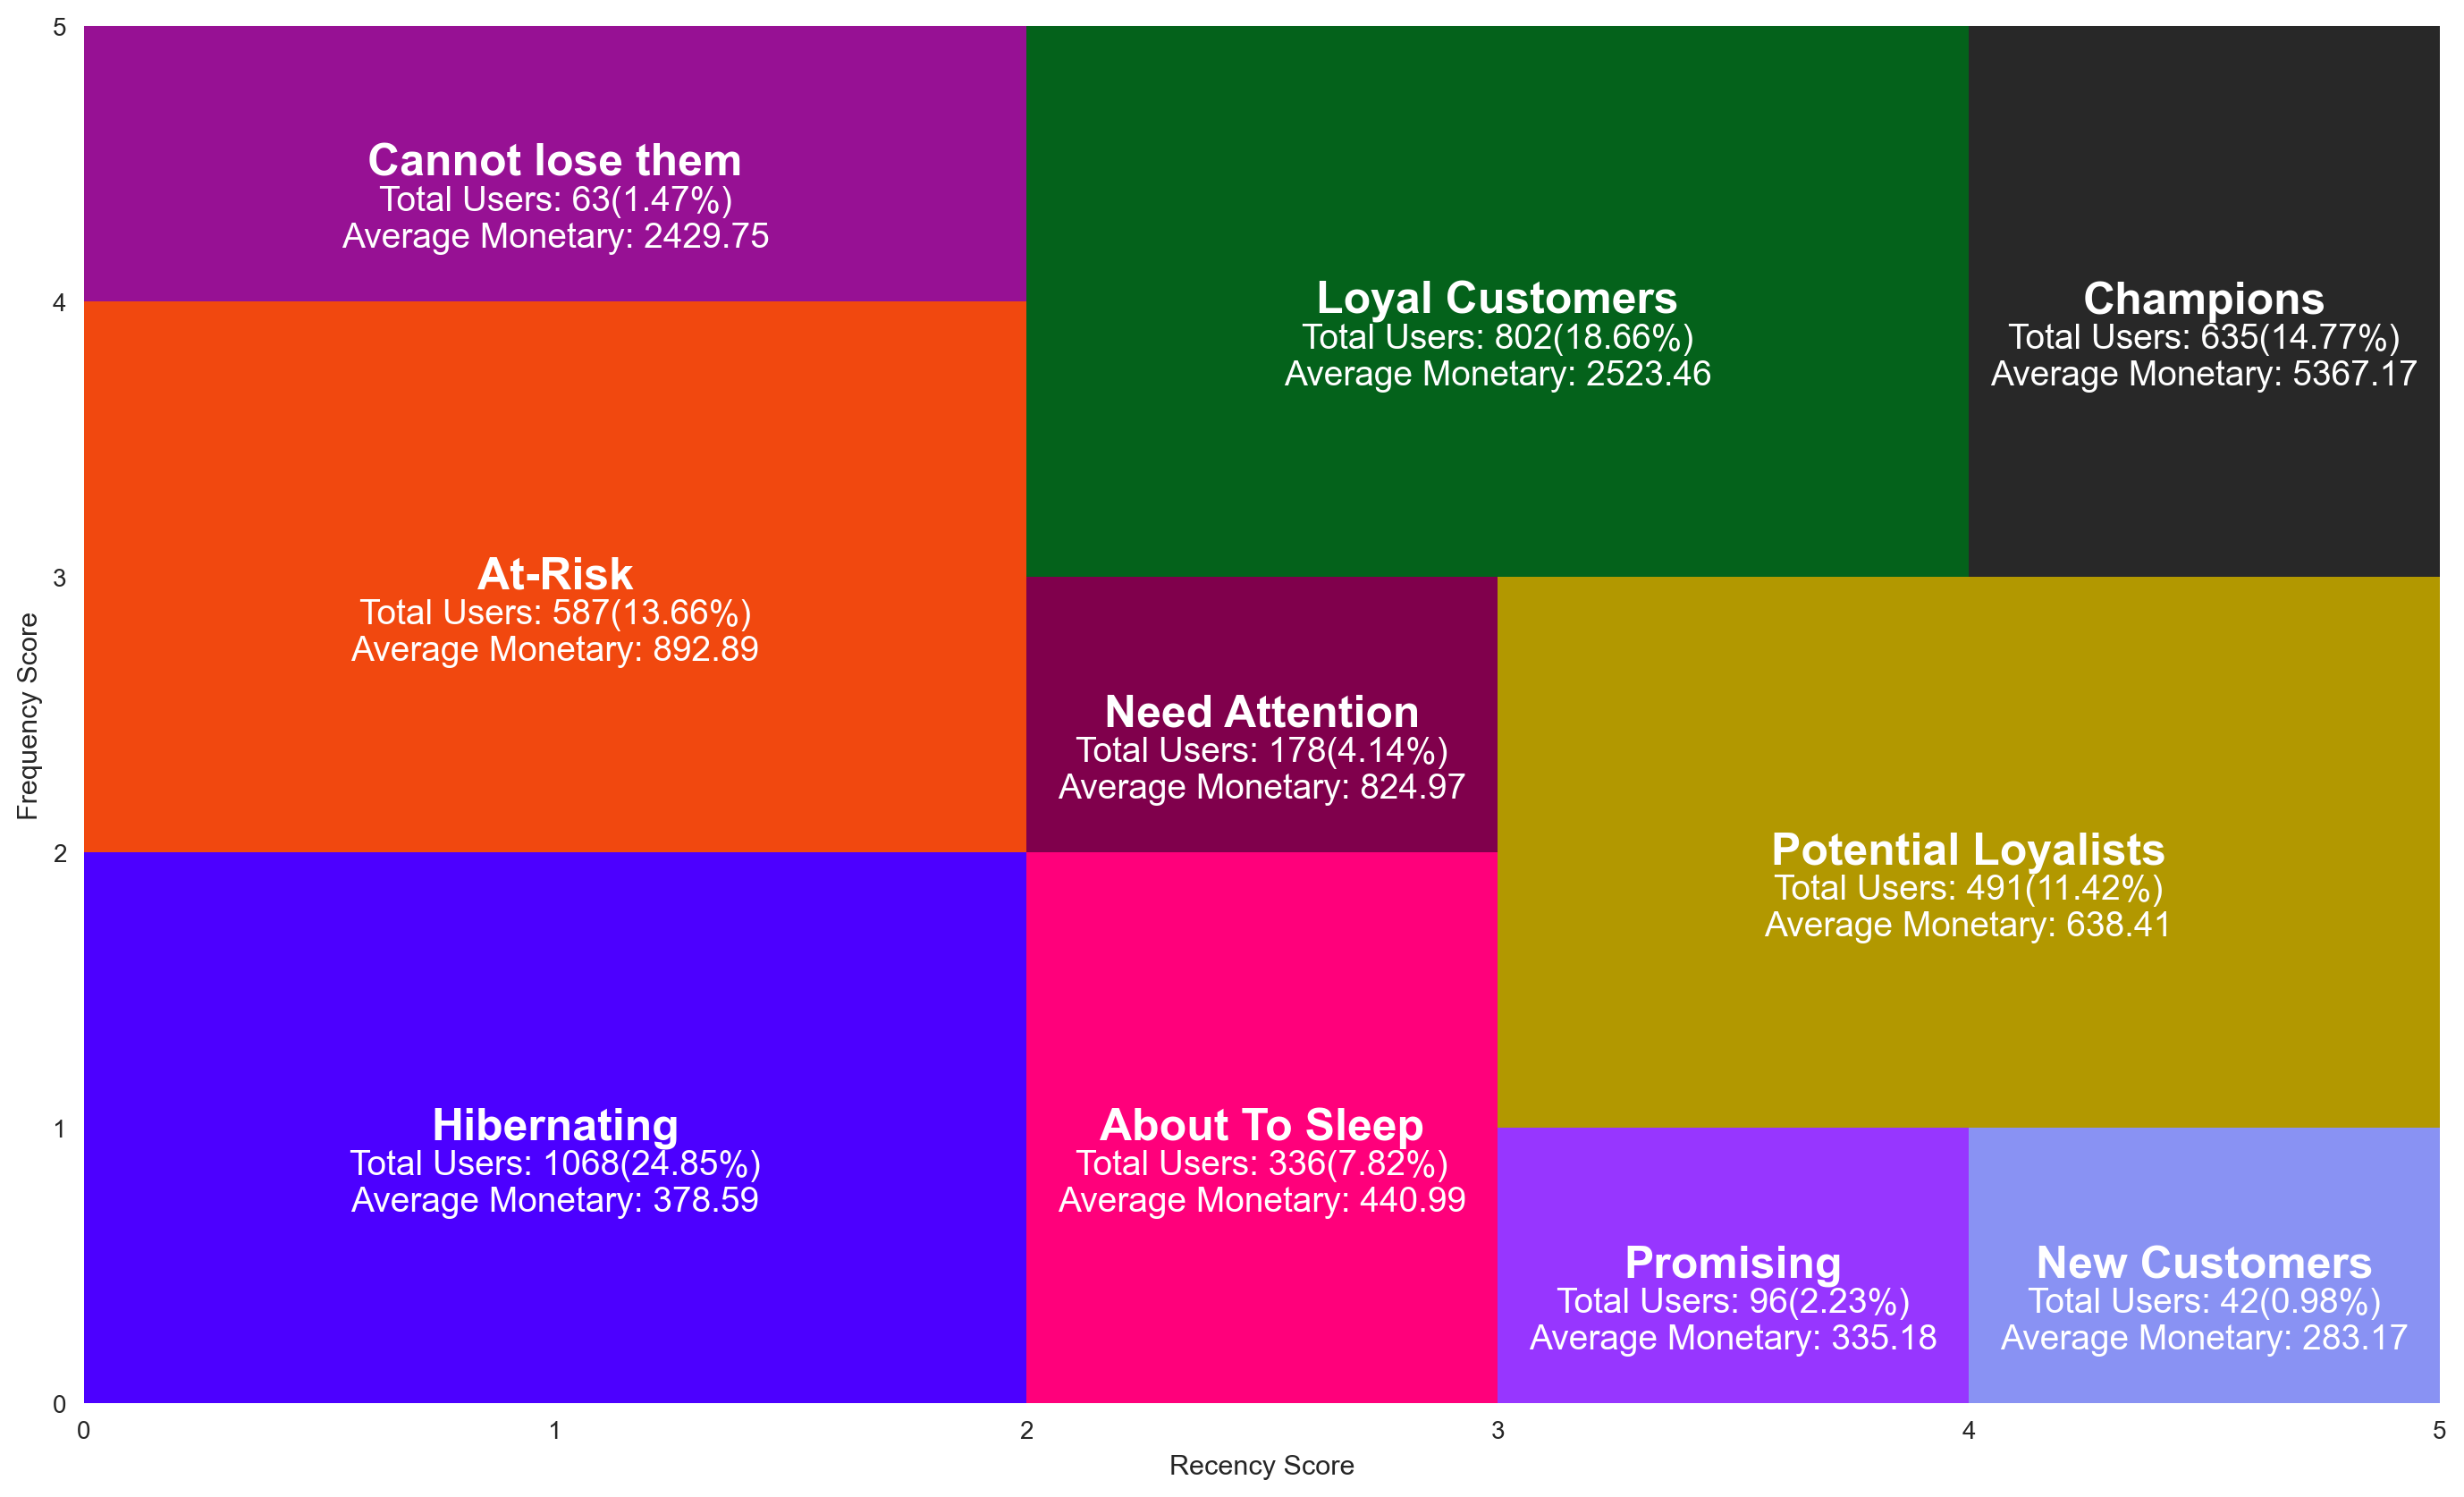

In [63]:
fig, ax = plt.subplots(figsize = (17, 10))

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

plt.rcParams["axes.facecolor"] = "white"
palette = ["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF",
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C"]

for key, color in zip(rfm_coordinates.keys(), palette[:10]):

    coordinates = rfm_coordinates[key]
    ymin, ymax, xmin, xmax = coordinates[0], coordinates[1], coordinates[2], coordinates[3]

    ax.axhspan(ymin = ymin, ymax = ymax, xmin = xmin, xmax = xmax, facecolor = color)

    users = rfm_table[rfm_table.Segment == key].shape[0]
    users_percentage = (rfm_table[rfm_table.Segment == key].shape[0] / rfm_table.shape[0]) * 100
    avg_monetary = rfm_table[rfm_table.Segment == key]["Monetary"].mean()

    user_txt = "\n\nTotal Users: " + str(users) + "(" +  str(round(users_percentage, 2)) + "%)"
    monetary_txt = "\n\n\n\nAverage Monetary: " + str(round(avg_monetary, 2))

    x = 5 * (xmin + xmax) / 2
    y = (ymin + ymax) / 2

    plt.text(x = x, y = y, s = key, ha = "center", va = "center", fontsize = 18, color = "white", fontweight = "bold")
    plt.text(x = x, y = y, s = user_txt, ha = "center", va = "center", fontsize = 14, color = "white")
    plt.text(x = x, y = y, s = monetary_txt, ha = "center", va = "center", fontsize = 14, color = "white")

    ax.set_xlabel("Recency Score")
    ax.set_ylabel("Frequency Score")

sns.despine(left = True, bottom = True)
plt.show()

# Visualizing RFM Segments

In [64]:
rfm_table2 = rfm_table.reset_index()

rfm_monetary_size = rfm_table2.groupby("Segment").agg({"Monetary": "mean",
                                                       "CustomerID": "nunique"})

rfm_monetary_size.rename(columns = {"Monetary": "MeanMonetary", "CustomerID": "CustomerCount"}, inplace = True)
rfm_monetary_size = rfm_monetary_size.sort_values("MeanMonetary", ascending = False)

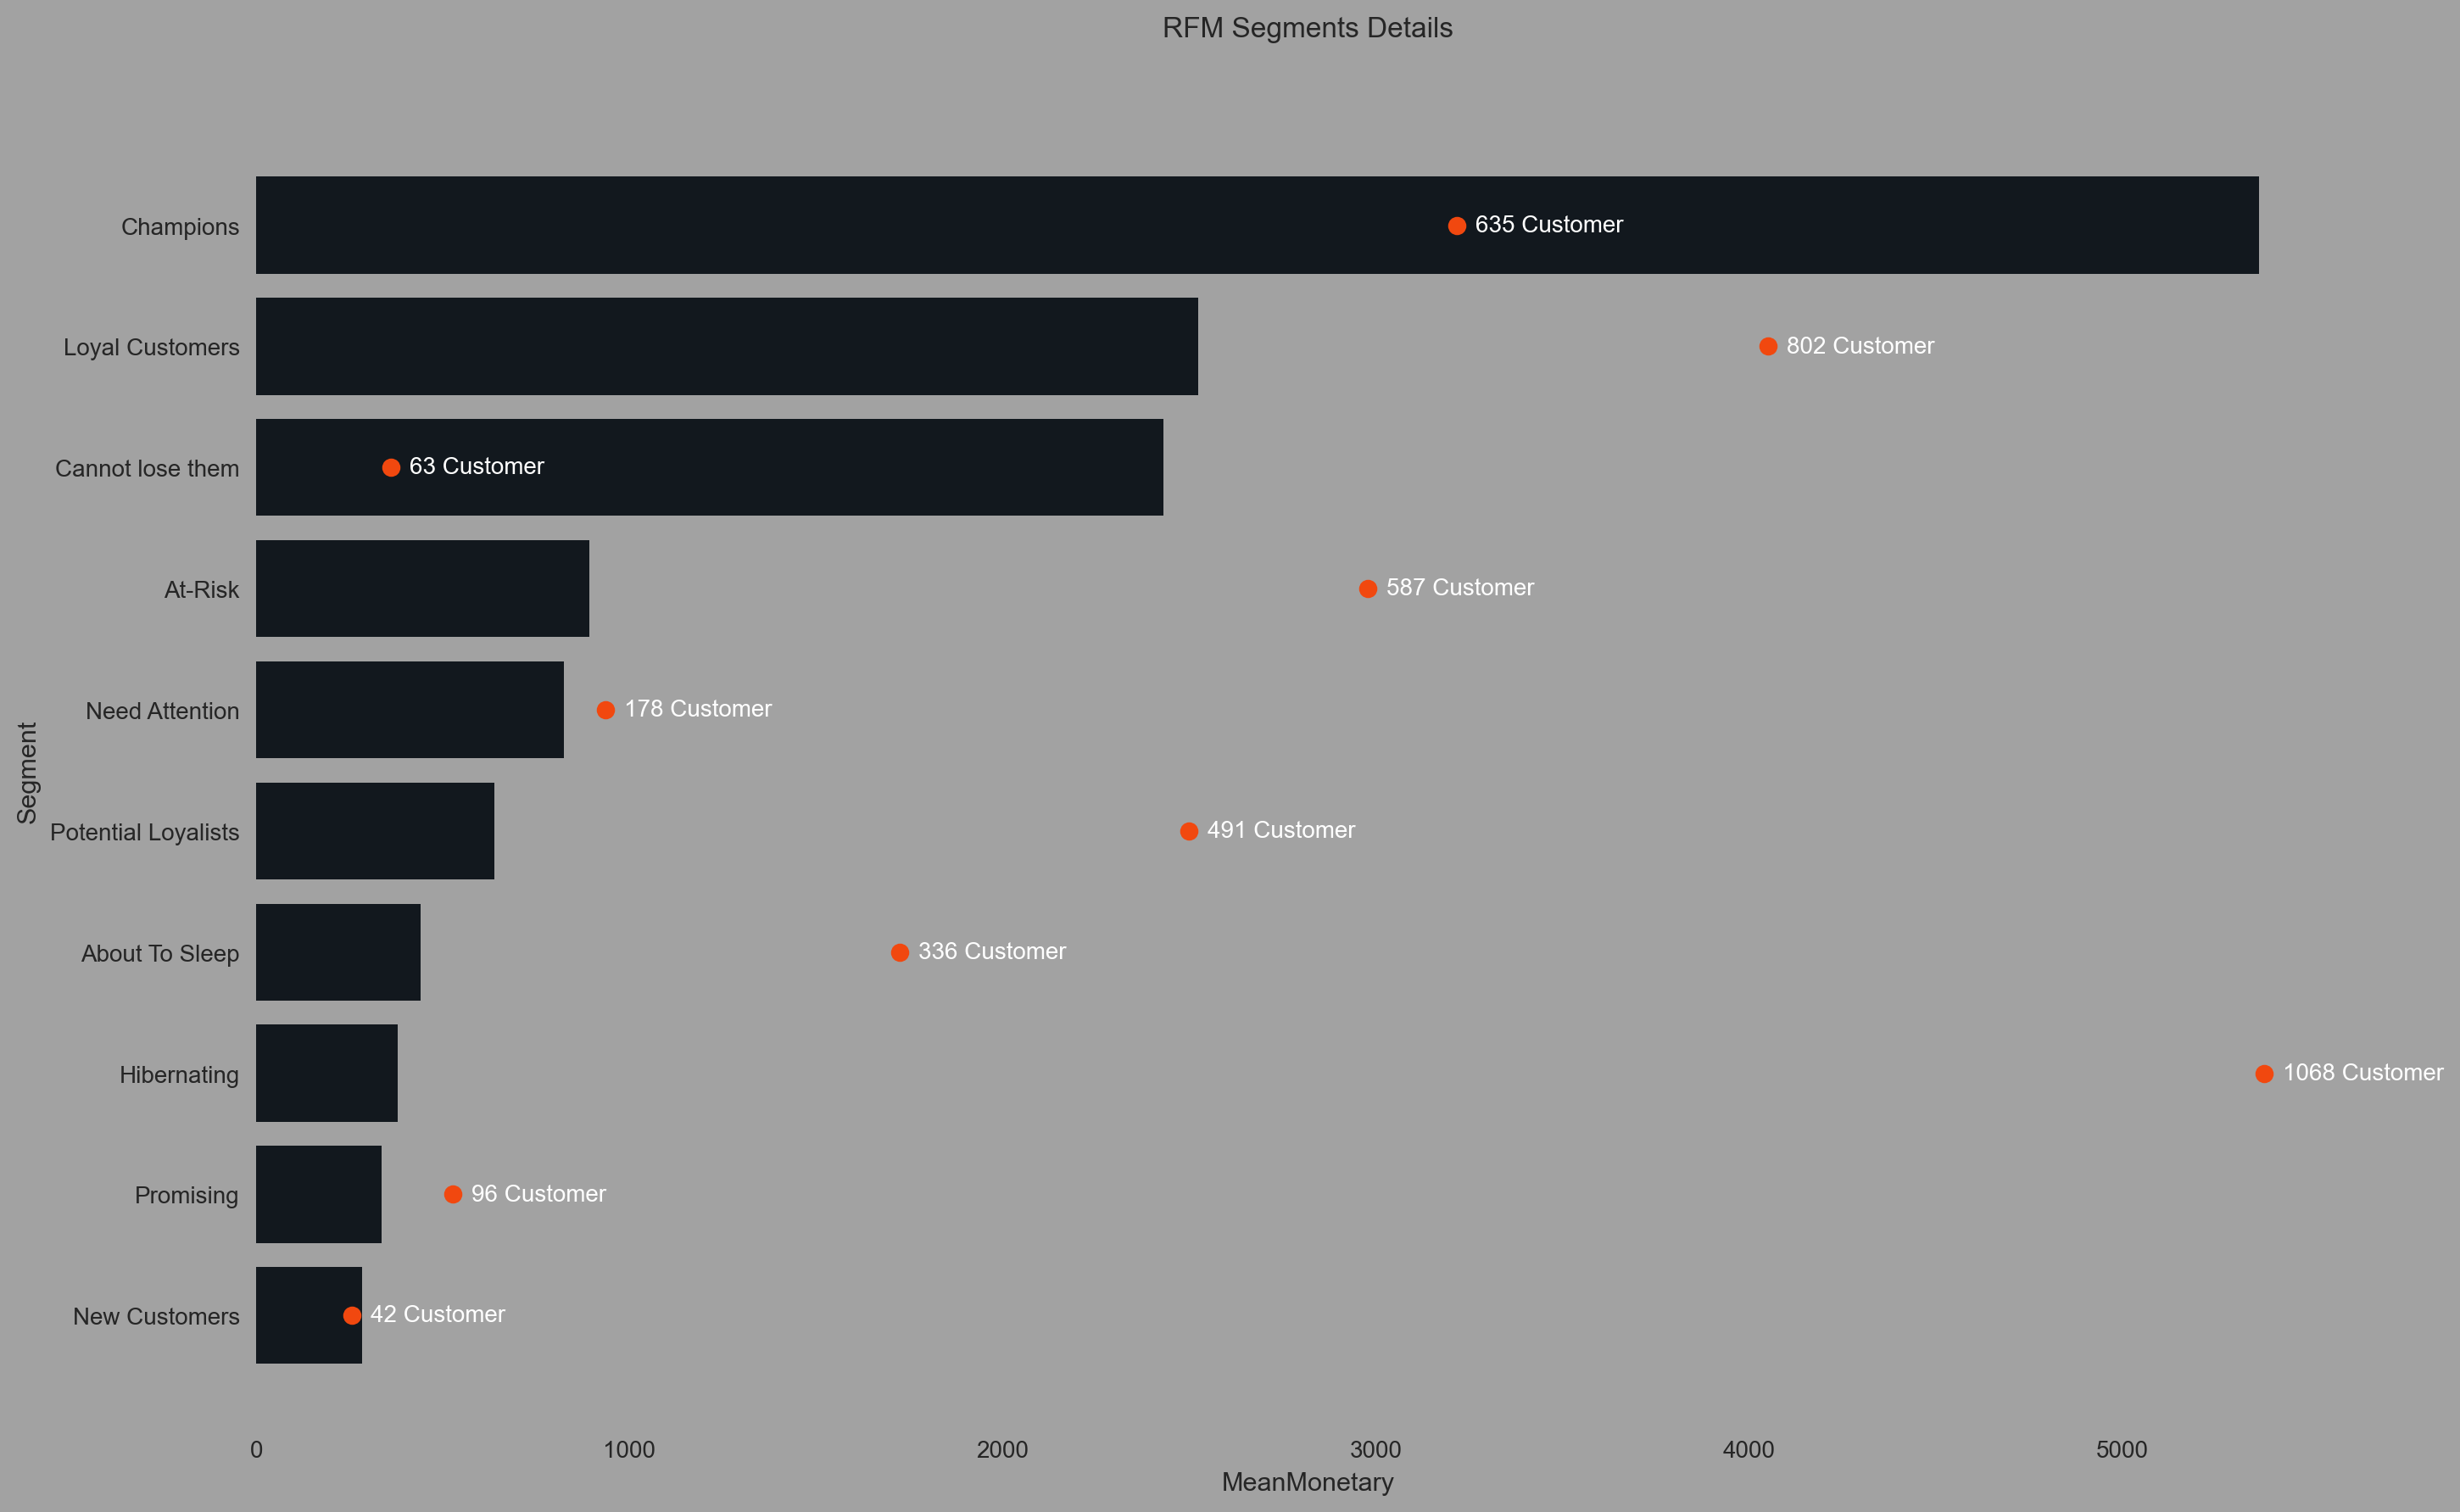

In [65]:
plt.rcParams["axes.facecolor"] = "#A2A2A2"
plt.rcParams["axes.grid"] = False

fig, ax = plt.subplots(figsize = (16, 10), facecolor = "#A2A2A2")

sns.barplot(x = rfm_monetary_size.MeanMonetary, y = rfm_monetary_size.index, ax = ax, color = "#101820")
ax2 = ax.twiny()
sns.lineplot(x = rfm_monetary_size.CustomerCount, y = rfm_monetary_size.index, ax = ax2, marker = "o", linewidth = 0,
             color = "#F1480F", markeredgecolor = "#F1480F")

ax2.axis("off")

for y, x in list(enumerate(rfm_monetary_size.CustomerCount)):
    ax2.text(x + 10, y + 0.05, str(x) + " Customer", color = "white", fontweight = "normal")

plt.title("RFM Segments Details")
sns.despine(left = True, right = True, bottom = True, top = True)
plt.show()

In [66]:
monetary_per_segment = (rfm_table2.groupby("Segment")["Monetary"].sum() /\
                        rfm_table2.groupby("Segment")["Monetary"].sum().sum()).sort_values(ascending = False)

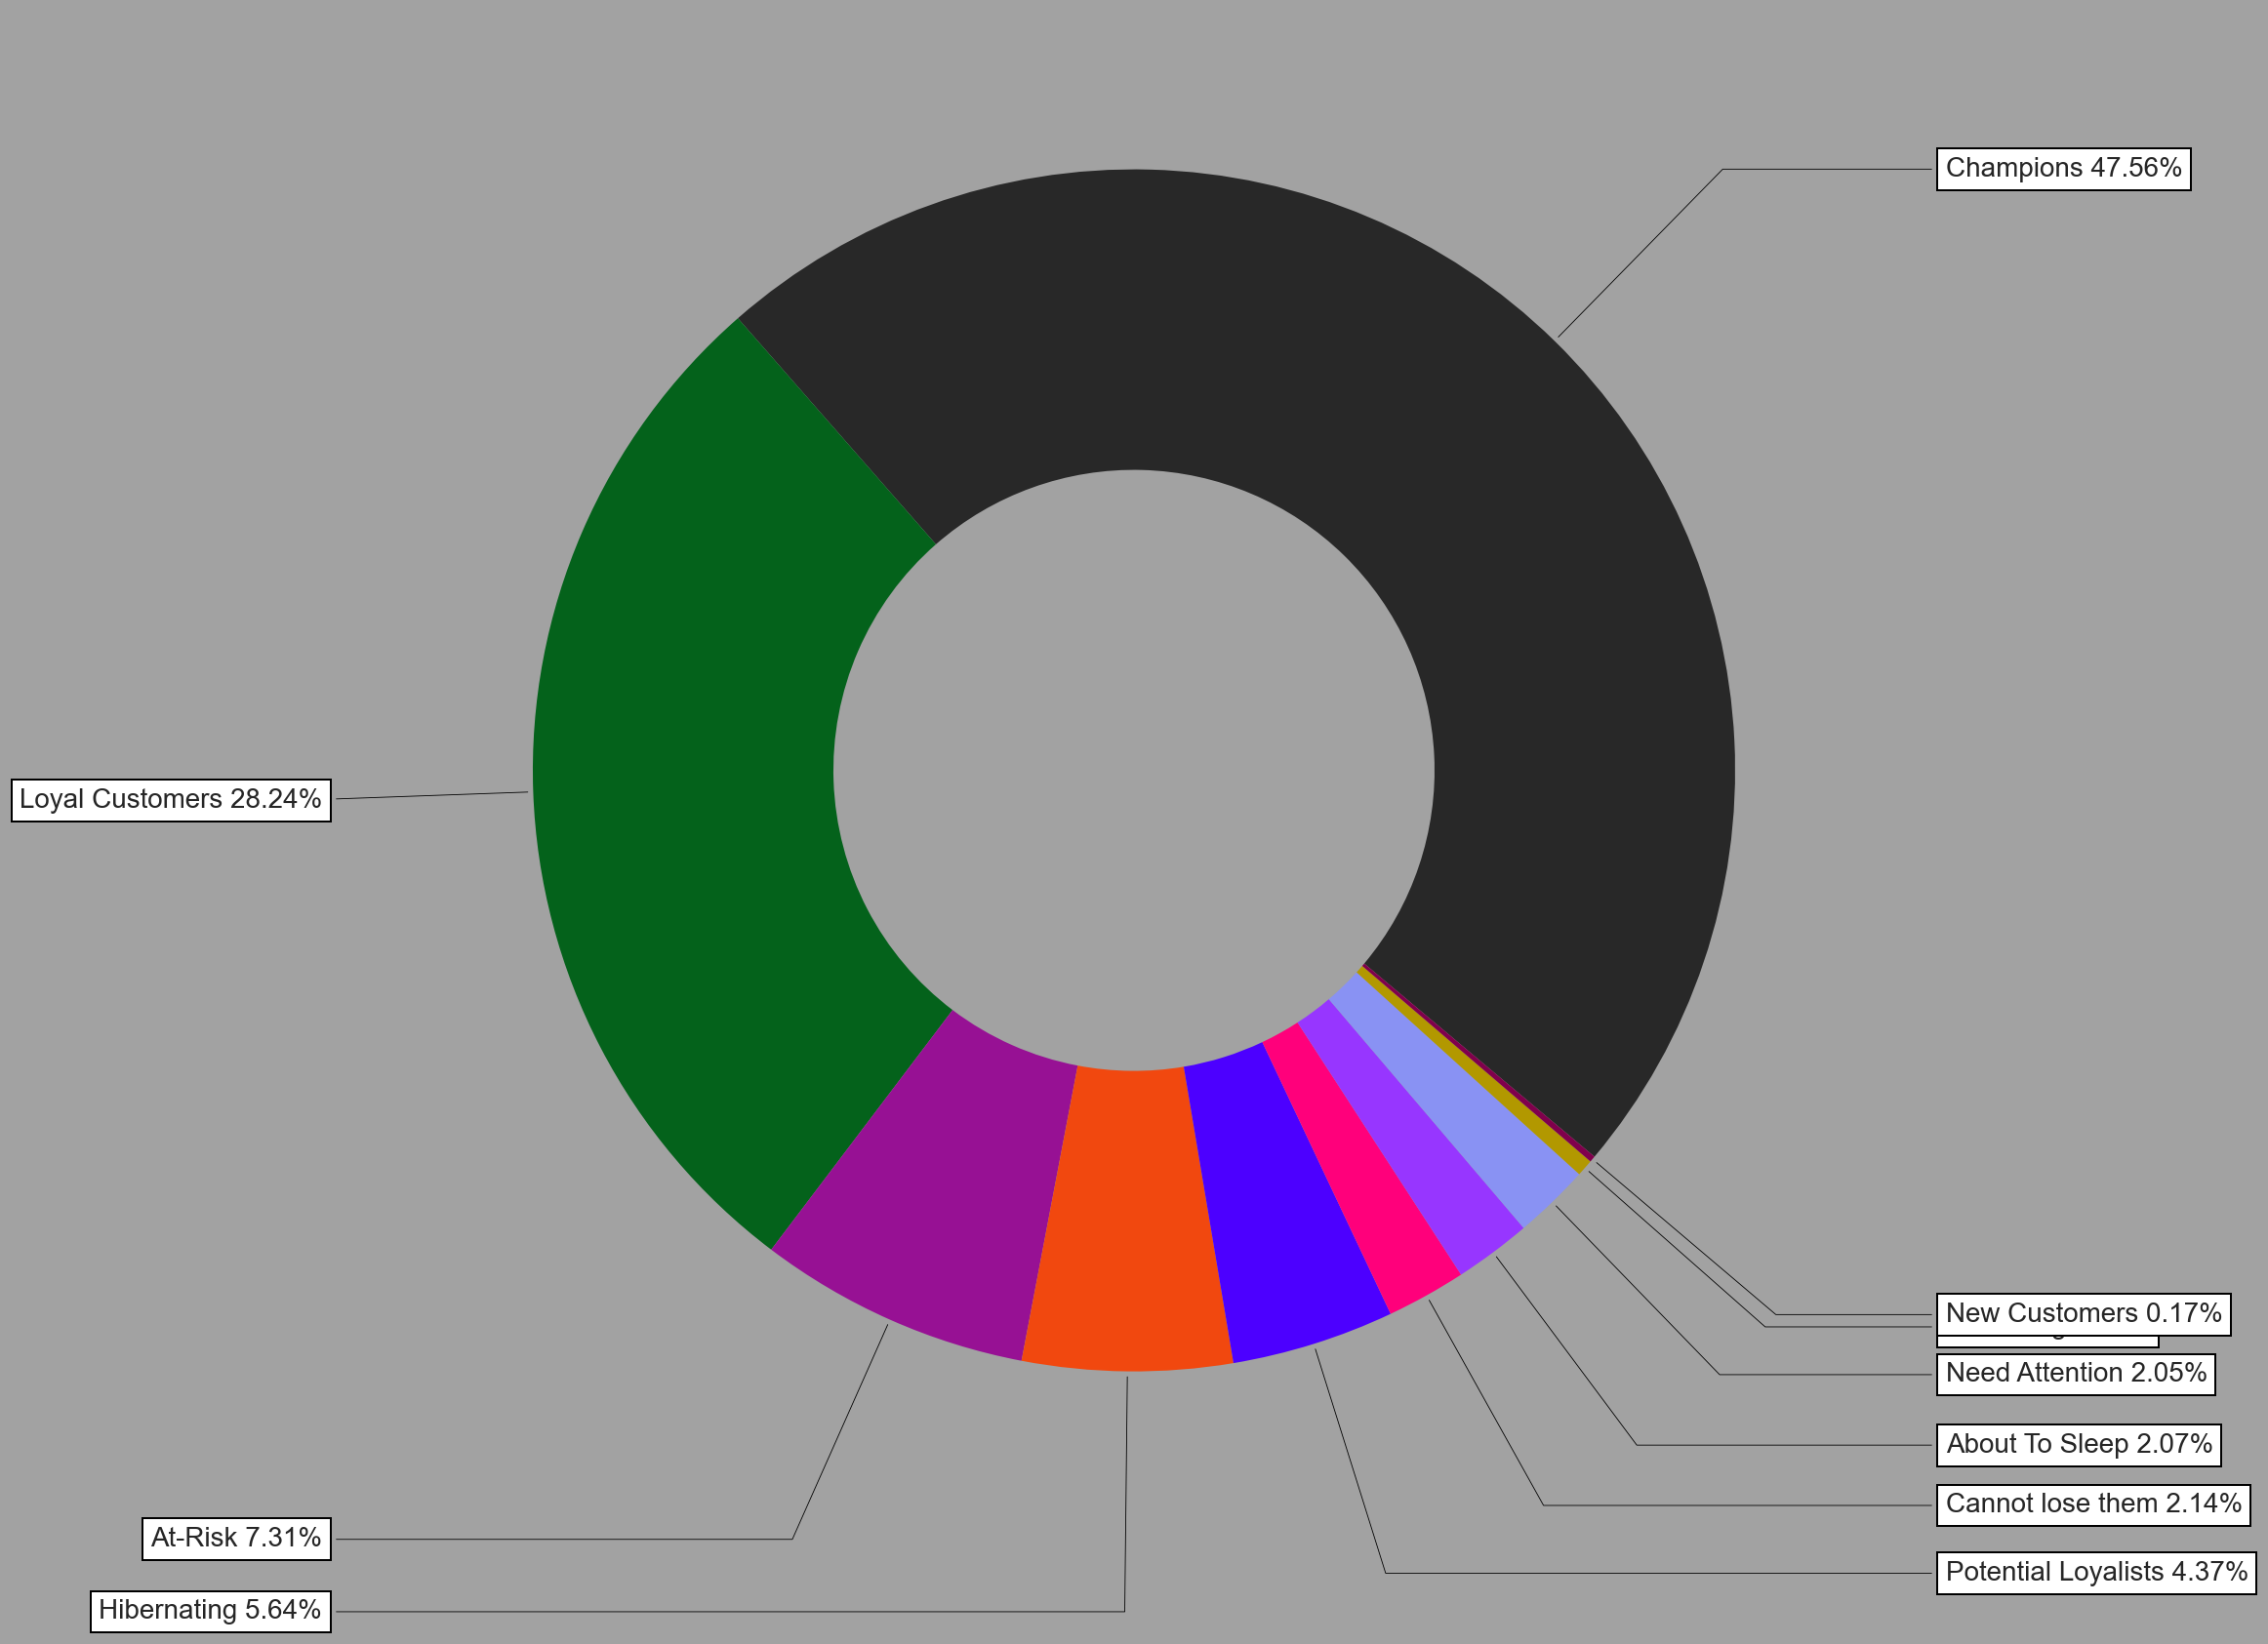

In [67]:
fig, ax = plt.subplots(figsize = (10, 10), facecolor = "#A2A2A2")

wedges, texts = ax.pie(monetary_per_segment.values, wedgeprops=dict(width=0.5), startangle=-40, normalize=False, colors = palette)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(monetary_per_segment.index[i] + " " + str(round(monetary_per_segment[i] * 100, 2)) + "%", xy=(x, y),
                xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment, **kw)
plt.show()

47.5% of total revenue comes from "Champions" segment, and 28% of total revenue comes from "Loyal Customers" segment. These two segments have 75% of company's total revenue.